# Proyecto F1


## Library and Data Loading 

In [3]:
# Install necessary libraries
# %pip install pandas numpy seaborn matplotlib plotly timple fastf1

In [60]:
import pandas as pd
import numpy as np

import json
import os


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
from plotly.io import show
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from timple.timedelta import strftimedelta
import datetime
import fastf1
import fastf1.plotting
from fastf1.core import Laps
from fastf1.ergast import Ergast

import statistics as st
from time import sleep

import warnings
warnings.filterwarnings("ignore")



In [2]:
import APP.functions as f

## Functions

In [ ]:
# ## DATA LOA

# #make a function to get the data from a given session

# def get_dataX(year, circuit, session):
#     session = fastf1.get_session(year, circuit, session)
#     session.load(weather=True)
#     session_df = pd.DataFrame(session.laps)
#     weather_df = pd.DataFrame(session.laps.get_weather_data())

#     weather_df = weather_df.reset_index(drop=True).drop(columns=['Time'])
#     session_df = pd.concat([session_df, weather_df], axis=1)

#     # session_df.to_csv(f'{year}_{circuit}_{session}.csv')
#     return session, session_df

# #Make a session to get an event given the year and the circuit
# def get_eventX(year, circuit):
#     event = fastf1.get_event(year, circuit)
#     return event

# #Make a function that, given an event, gets all the sessions in this event and stores them in a dataframe with an identifier for each session
# def get_sessions_in_eventX(event):
#     event_df = pd.DataFrame(event).T.reset_index(drop=True)

#     sessions_ID = [event_df[f'Session{i}'][0] for i in range(1, 6)]
#     sessions_list = []

#     for session_ID in sessions_ID:
#         session = event.get_session(session_ID)
#         session.load(weather=True)
#         session_df = pd.DataFrame(session.laps)
#         weather_df = pd.DataFrame(session.laps.get_weather_data())

#         weather_df = weather_df.reset_index(drop=True).drop(columns=['Time'])
#         session_df = pd.concat([session_df, weather_df], axis=1)
        
#         session_df['Session_ID'] = session_ID
#         sessions_list.append(session_df)
#         all_sessions_df = pd.concat(sessions_list, ignore_index=True)

#     return sessions_list, all_sessions_df

# #Make a function that, given an event, gets the qualifying results as a dataframe 

# def get_qualifying_resultsX(Q_session):
#     Q_session.load(weather=True)
#     Q_result = Q_session.results
#     Q_result_df = pd.DataFrame(Q_result)

#     Q_weather_df = pd.DataFrame(Q_session.laps.get_weather_data())

#     Q_result_df = Q_result_df[['DriverNumber', 'Abbreviation', 'DriverId', 'TeamName',
#        'TeamColor', 'TeamId', 'Position', 'ClassifiedPosition', 'Q1', 'Q2', 'Q3', 'Time']]

#     return Q_result_df, Q_weather_df




# #Make a function that, given a year and a circuit, gets all the data from the sessions in this event
# def get_all_data_eventX(year, circuit):
#     event = get_eventX(year, circuit)
#     sessions_list, all_sessions_df = get_sessions_in_eventX(event)

#     return sessions_list, all_sessions_df

# #Make a function that, given the year, gets all the data from all the events in this year
# def get_all_data_yearX(year, rango = (1, 22)):
#     events = []
#     Q_results = []
#     qual_weathers = []
#     for i in range(rango[0], rango[1]+1):
#         event = get_eventX(year, i)
#         event_name = event.EventName
#         Q_session = event.get_qualifying()

#         Q_result_df, Q_weather_df = get_qualifying_resultsX(Q_session)
#         Q_result_df['Event_Name'] = event_name
#         Q_weather_df['Event_Name'] = event_name
#         Q_results.append(Q_result_df)
#         qual_weathers.append(Q_weather_df)


#         try:
#             _, all_sessions_df = get_sessions_in_eventX(event)
#             all_sessions_df['Event_Name'] = event_name
#             events.append(all_sessions_df)
#         except Exception as e:
#             print(f"An error occurred for event {i} in year {year}: {e}")
#             continue
#         all_events_df = pd.concat(events, ignore_index=True)
#         all_qual_weathers_df = pd.concat(qual_weathers, ignore_index=True)
#         all_Q_results_df = pd.concat(Q_results, ignore_index=True)
#     return all_events_df, all_Q_results_df, all_qual_weathers_df



In [25]:
# ergast = Ergast()
# races = ergast.get_race_schedule(2023)  
# results = []
# sprint_results = []

# For each race in the season
print(list(races['raceName'].unique()))

['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Azerbaijan Grand Prix', 'Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix', 'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 'Japanese Grand Prix', 'Qatar Grand Prix', 'United States Grand Prix', 'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Abu Dhabi Grand Prix']


### Data Loading

In [14]:

def get_season_results(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)  
    results = []
    sprint_results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():

        # Get race results
        temp = ergast.get_race_results(season=year, round=rnd + 1)
        result = pd.DataFrame(temp.content[0])
        
        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=year, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            sprint_result = pd.DataFrame(sprint.content[0])
            sprint_result['raceName'] = race
            sprint_results.append(sprint_result)

        result['raceName'] = race
        results.append(result)

    # Concatenate all results
    results = pd.concat(results, ignore_index=True)
    sprint_results = pd.concat(sprint_results, ignore_index=True) if sprint_results else pd.DataFrame()
    results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_results.csv', index=False)
    sprint_results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_sprint_results.csv', index=False)

def get_season_q_results(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)  
    q_results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():

        # Get results
        temp = ergast.get_qualifying_results(season=year, round=rnd + 1)
        q_result = pd.DataFrame(temp.content[0])
        q_result['raceName'] = race
        q_results.append(q_result)

    # Concatenate all results
    q_results = pd.concat(q_results, ignore_index=True)
    q_results = q_results.copy()

    q_results['Q1'] = pd.to_timedelta(q_results['Q1'])
    q_results['Q2'] = pd.to_timedelta(q_results['Q2'])
    q_results['Q3'] = pd.to_timedelta(q_results['Q3'])

    q_results['Q1 (s)'] = q_results['Q1'].dt.total_seconds().round(3)
    q_results['Q2 (s)'] = q_results['Q2'].dt.total_seconds().round(3)
    q_results['Q3 (s)'] = q_results['Q3'].dt.total_seconds().round(3)
    
    q_results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_q_results.csv', index=False)
    


In [ ]:
year = 2021
results, sprint_results = get_season_results(year)
q_results = get_season_q_results(year)

results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_results.csv', index=False)
sprint_results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_sprint_results.csv', index=False)
q_results.to_csv(rf'.\data\bueno\{year}\HtH\{year}_q_results.csv', index=False)

In [16]:
year = 2023
results_23 = pd.read_csv(rf'.\data\bueno\{year}\HtH\2023_results.csv')
results_23

number  position positionText  points  grid  laps    status  \
0         1         1            1    25.0     1    57  Finished   
1        11         2            2    18.0     2    57  Finished   
2        14         3            3    15.0     5    57  Finished   
3        55         4            4    12.0     4    57  Finished   
4        44         5            5    10.0     7    57  Finished   
..      ...       ...          ...     ...   ...   ...       ...   
435       2        16           16     0.0    20    58  Finished   
436      24        17           17     0.0    19    58  Finished   
437      55        18           18     0.0    16    57   Retired   
438      77        19           19     0.0    18    57    +1 Lap   
439      20        20           20     0.0    17    57    +1 Lap   

            driverId  driverNumber driverCode  ... constructorName  \
0     max_verstappen            33        VER  ...        Red Bull   
1              perez            11        PER  ...        Red Bull   
2             alonso            14        ALO  ...    Aston Martin   
3              sainz            55        SAI  ...         Ferrari   
4           hamilton            44        HAM  ...        Mercedes   
..               ...           ...        ...  ...             ...   
435         sargeant             2        SAR  ...        Williams   
436             zhou            24        ZHO  ...      Alfa Romeo   
437            sainz            55        SAI  ...         Ferrari   
438           bottas            77        BOT  ...      Alfa Romeo   
439  kevin_magnussen            20        MAG  ...    Haas F1 Team   

    constructorNationality totalRaceTimeMillis           totalRaceTime  \
0                 Austrian           5636736.0  0 days 01:33:56.736000   
1                 Austrian           5648723.0  0 days 00:00:11.987000   
2                  British           5675373.0  0 days 00:00:38.637000   
3                  Italian           5684788.0  0 days 00:00:48.052000   
4                   German           5687713.0  0 days 00:00:50.977000   
..                     ...                 ...                     ...   
435                British           5310415.0  0 days 00:01:27.791000   
436                  Swiss           5312046.0  0 days 00:01:29.422000   
437                Italian                 NaN                     NaN   
438                  Swiss                 NaN                     NaN   
439               American                 NaN                     NaN   

    fastestLapRank fastestLapNumber          fastestLapTime  \
0              6.0             44.0  0 days 00:01:36.236000   
1              7.0             37.0  0 days 00:01:36.344000   
2              5.0             36.0  0 days 00:01:36.156000   
3             14.0             37.0  0 days 00:01:37.130000   
4             10.0             36.0  0 days 00:01:36.546000   
..             ...              ...                     ...   
435           12.0             43.0  0 days 00:01:28.580000   
436           13.0             43.0  0 days 00:01:28.746000   
437           17.0             42.0  0 days 00:01:29.452000   
438           18.0             42.0  0 days 00:01:29.863000   
439           19.0             46.0  0 days 00:01:29.934000   

    fastestLapAvgSpeedUnits fastestLapAvgSpeed              raceName  
0                       kph            202.452    Bahrain Grand Prix  
1                       kph            202.225    Bahrain Grand Prix  
2                       kph            202.620    Bahrain Grand Prix  
3                       kph            200.588    Bahrain Grand Prix  
4                       kph            201.802    Bahrain Grand Prix  
..                      ...                ...                   ...  
435                     kph            214.626  Abu Dhabi Grand Prix  
436                     kph            214.224  Abu Dhabi Grand Prix  
437                     kph            212.534  Abu Dhabi Gran

# Temporada

## Head-to-Head

In [33]:
#Filter the results to get only the drivers indicated

def results_pair(results, drivers_to_comp):
    results_to_comp = results[results['driverCode'].isin(drivers_to_comp)]

    for index, row in results_to_comp.iterrows():
        if row['grid'] == 0:
            results_to_comp.at[index, 'grid'] = 20

    return results_to_comp

def results_pair_sprint(sprint_results, drivers_to_comp):
    sprint_results_to_comp = sprint_results[sprint_results['driverCode'].isin(drivers_to_comp)]

    for index, row in sprint_results_to_comp.iterrows():
        if row['grid'] == 0:
            sprint_results_to_comp.at[index, 'grid'] = 20

    return sprint_results_to_comp

In [ ]:
resu

In [31]:
## Functions for comparisons
# Compare total points for each driver
def compare_points(drivers_to_comp, results_to_comp, sprint_results):
    points_comp = {}
    for driver in drivers_to_comp:
        # Sum points for each driver including sprint results
        race_points = results_to_comp[results_to_comp['driverCode'] == driver]['points'].sum()
        sprint_points = sprint_results[sprint_results['driverCode'] == driver]['points'].sum()
        points_comp[driver] = race_points + sprint_points
    return points_comp



# Compare final positions for each race
def compare_final_positions(drivers_to_comp, results_to_comp):
    final_positions = pd.DataFrame()
    for race in results_to_comp['raceName'].unique():
        race_positions = {}
        for driver in drivers_to_comp:
            # Get final position for each driver in each race
            final_pos = results_to_comp['position'][(results_to_comp['raceName'] == race) & (results_to_comp['driverCode'] == driver)].values[0]
            race_positions[driver] = final_pos
        final_positions[race] = pd.Series(race_positions)
    final_positions.index = drivers_to_comp
    final_positions = final_positions.T
    return final_positions

# Compare final position changes between drivers
def compare_final_position_comp(drivers_to_comp, final_positions):
    final_position_comp = {driver: 0 for driver in drivers_to_comp}
    for i in final_positions.diff(axis=1)[drivers_to_comp[1]]:
        # Compare position changes between drivers
        if i > 0:
            final_position_comp[drivers_to_comp[0]] += 1
        elif i < 0:
            final_position_comp[drivers_to_comp[1]] += 1
    return final_position_comp



# Compare positions gained during races
def compare_positions_gained(drivers_to_comp, results_to_comp):
    positions_gained = pd.DataFrame()
    for race in results_to_comp['raceName'].unique():
        race_positions = {}
        for driver in drivers_to_comp:
            # Calculate positions gained by each driver
            grid_pos = results_to_comp['grid'][(results_to_comp['raceName'] == race) & (results_to_comp['driverCode'] == driver)].values[0]
            final_pos = results_to_comp['position'][(results_to_comp['raceName'] == race) & (results_to_comp['driverCode'] == driver)].values[0]
            race_positions[driver] = grid_pos - final_pos
        positions_gained[race] = pd.Series(race_positions)
    positions_gained.index = drivers_to_comp
    positions_gained = positions_gained.T
    return positions_gained

# Compare positions gained over the year
def compare_year_positions_gained(drivers_to_comp, positions_gained):
    positions_gained_comp = {}

    for driver in drivers_to_comp:
        # Calculate total positions gained for each driver
        positions_gained_comp[driver] = positions_gained[driver].sum()
    return positions_gained_comp





# Get qualifying positions for each race
def get_quali_positions(drivers_to_comp, quali_results):
    quali_positions = pd.DataFrame()
    for race in quali_results['raceName'].unique():
        race_positions = {}
        for driver in drivers_to_comp:
            # Get qualifying position for each driver in each race
            final_pos = quali_results['position'][(quali_results['raceName'] == race) & (quali_results['driverCode'] == driver)].values[0]
            race_positions[driver] = final_pos
        quali_positions[race] = pd.Series(race_positions)
    quali_positions.index = drivers_to_comp
    quali_positions = quali_positions.T
    return quali_positions

# Compare qualifyig position changes between drivers
def compare_quali_position(drivers_to_comp, quali_positions):
    quali_position_comp = {driver: 0 for driver in drivers_to_comp}
    for i in quali_positions.diff(axis=1)[drivers_to_comp[1]]:
        # Compare qualifying position changes between drivers
        if i > 0:
            quali_position_comp[drivers_to_comp[0]] += 1
        elif i < 0:
            quali_position_comp[drivers_to_comp[1]] += 1
    return quali_position_comp


def get_quali_times(drivers_to_comp, quali_results):
    quali_times = pd.DataFrame(index=quali_results['raceName'].unique(), columns=drivers_to_comp)
    quali_results_to_compare = quali_results[quali_results['driverCode'].isin(drivers_to_comp)]

    for _, row in quali_results_to_compare.iterrows():
        if pd.isna(row['Q3 (s)']):
            if pd.isna(row['Q2 (s)']):
                quali_times.loc[row['raceName'], row['driverCode']] = row['Q1 (s)']
            else:
                quali_times.loc[row['raceName'], row['driverCode']] = row['Q2 (s)']
        else:
            quali_times.loc[row['raceName'], row['driverCode']] = row['Q3 (s)']

    return quali_times

def compare_quali_times(drivers_to_comp, quali_times):
    quali_diff = {}

    quali_diff[drivers_to_comp[0]] = -(quali_times.diff(axis=1).loc[:, drivers_to_comp[1]].mean().round(3))
    quali_diff[drivers_to_comp[1]] = quali_times.diff(axis=1).loc[:, drivers_to_comp[1]].mean().round(3)

    return quali_diff


# Compare number of DNFs for each driver
def compare_dnfs(drivers_to_comp, results_to_comp):
    n_DNF = {driver: 0 for driver in drivers_to_comp}
    for driver in drivers_to_comp:
        for _, row in results_to_comp.iterrows():
            # Count DNFs for each driver
            if row['driverCode'] == driver and row['status'] != 'Finished':
                if row['status'][0] != '+':
                    n_DNF[driver] += 1
    return n_DNF

# Compare number of wins and podiums for each driver
def compare_wins_and_podiums(drivers_to_comp, results_to_comp):
    n_wins = {driver: 0 for driver in drivers_to_comp}
    n_podiums = {driver: 0 for driver in drivers_to_comp}
    for _, row in results_to_comp.iterrows():
        # Count wins and podiums for each driver
        if row['position'] == 1:
            n_wins[row['driverCode']] += 1
        if row['position'] <= 3:
            n_podiums[row['driverCode']] += 1
    return n_wins, n_podiums

# Compare number of poles for each driver
def compare_poles(drivers_to_comp, quali_positions):
    n_poles = {driver: 0 for driver in drivers_to_comp}
    for driver in quali_positions.columns:
        n_poles[driver] = quali_positions[driver].value_counts().get(1, 0)
    return n_poles




#Recap all functions
def compare_results_pair(year, drivers_to_comp):
    results = pd.read_csv(rf'.\data\bueno\{year}\HtH\{year}_results.csv')
    sprint_results = pd.read_csv(rf'.\data\bueno\{year}\HtH\{year}_sprint_results.csv')
    q_results = pd.read_csv(rf'.\data\bueno\{year}\HtH\{year}_q_results.csv')

    results_to_comp = results_pair(results, drivers_to_comp)
    sprint_results_to_comp = results_pair_sprint(sprint_results, drivers_to_comp)

    points_comp = compare_points(drivers_to_comp, results_to_comp, sprint_results_to_comp)

    final_positions = compare_final_positions(drivers_to_comp, results_to_comp)
    final_position_comp = compare_final_position_comp(drivers_to_comp, final_positions)
    
    positions_gained = compare_positions_gained(drivers_to_comp, results_to_comp)
    year_positions_gained = compare_year_positions_gained(drivers_to_comp, positions_gained)
    
    quali_positions = get_quali_positions(drivers_to_comp, q_results)
    quali_position_comp = compare_quali_position(drivers_to_comp, quali_positions)
    quali_times = get_quali_times(drivers_to_comp, q_results)
    quali_diff = compare_quali_times(drivers_to_comp, quali_times)

    dnfs = compare_dnfs(drivers_to_comp, results_to_comp)
    wins, podiums = compare_wins_and_podiums(drivers_to_comp, results_to_comp)
    poles = compare_poles(drivers_to_comp, quali_positions)
        
    return {
        'points_comp': points_comp,
        'final_positions': final_positions,
        'final_position_comp': final_position_comp,
        'positions_gained': positions_gained,
        'year_positions_gained': year_positions_gained,
        'quali_positions': quali_positions,
        'quali_position_comp': quali_position_comp,
        'quali_times': quali_times,
        'quali_diff': quali_diff,
        'dnfs': dnfs,
        'wins': wins,
        'podiums': podiums,
        'poles': poles
        }



In [158]:
len(['VER', 'TSU', 'PIA', 'LEC', 'OCO', 'NOR', 'ZHO', 'HUL', 'MAG', 'PER', 'SAR', 'ALB', 'GAS', 'BOT', 'RUS', 'STR', 'HAM', 'SAI', 'ALO', 'DEV', 'RIC', 'LAW'])

22

In [157]:
comparisons = compare_results_pair(year = 2023, drivers_to_comp= ['LAW', 'RIC'])

# Print the comparisons
print("Points Comparison:", comparisons['points_comp'])
# print("Final Positions:", comparisons['final_positions'])
print("Final Position Head-to-head:", comparisons['final_position_comp'])
# print("Positions Gained Head-to-head:", comparisons['positions_gained'])
print("Year Positions Gained(+)/Lost(-):", comparisons['year_positions_gained'])
# print("Qualifying Positions:", comparisons['quali_positions'])
print("Qualifying Position Head-to-head:", comparisons['quali_position_comp'])
# print("Qualifying Times:", comparisons['quali_times'])
print("Qualifying Times Difference:", comparisons['quali_diff'])
print("DNFs Comparison:", comparisons['dnfs'])
print("Wins Comparison:", comparisons['wins'])
print("Podiums Comparison:", comparisons['podiums'])
print("Poles Comparison:", comparisons['poles'])

IndexError: index 0 is out of bounds for axis 0 with size 0

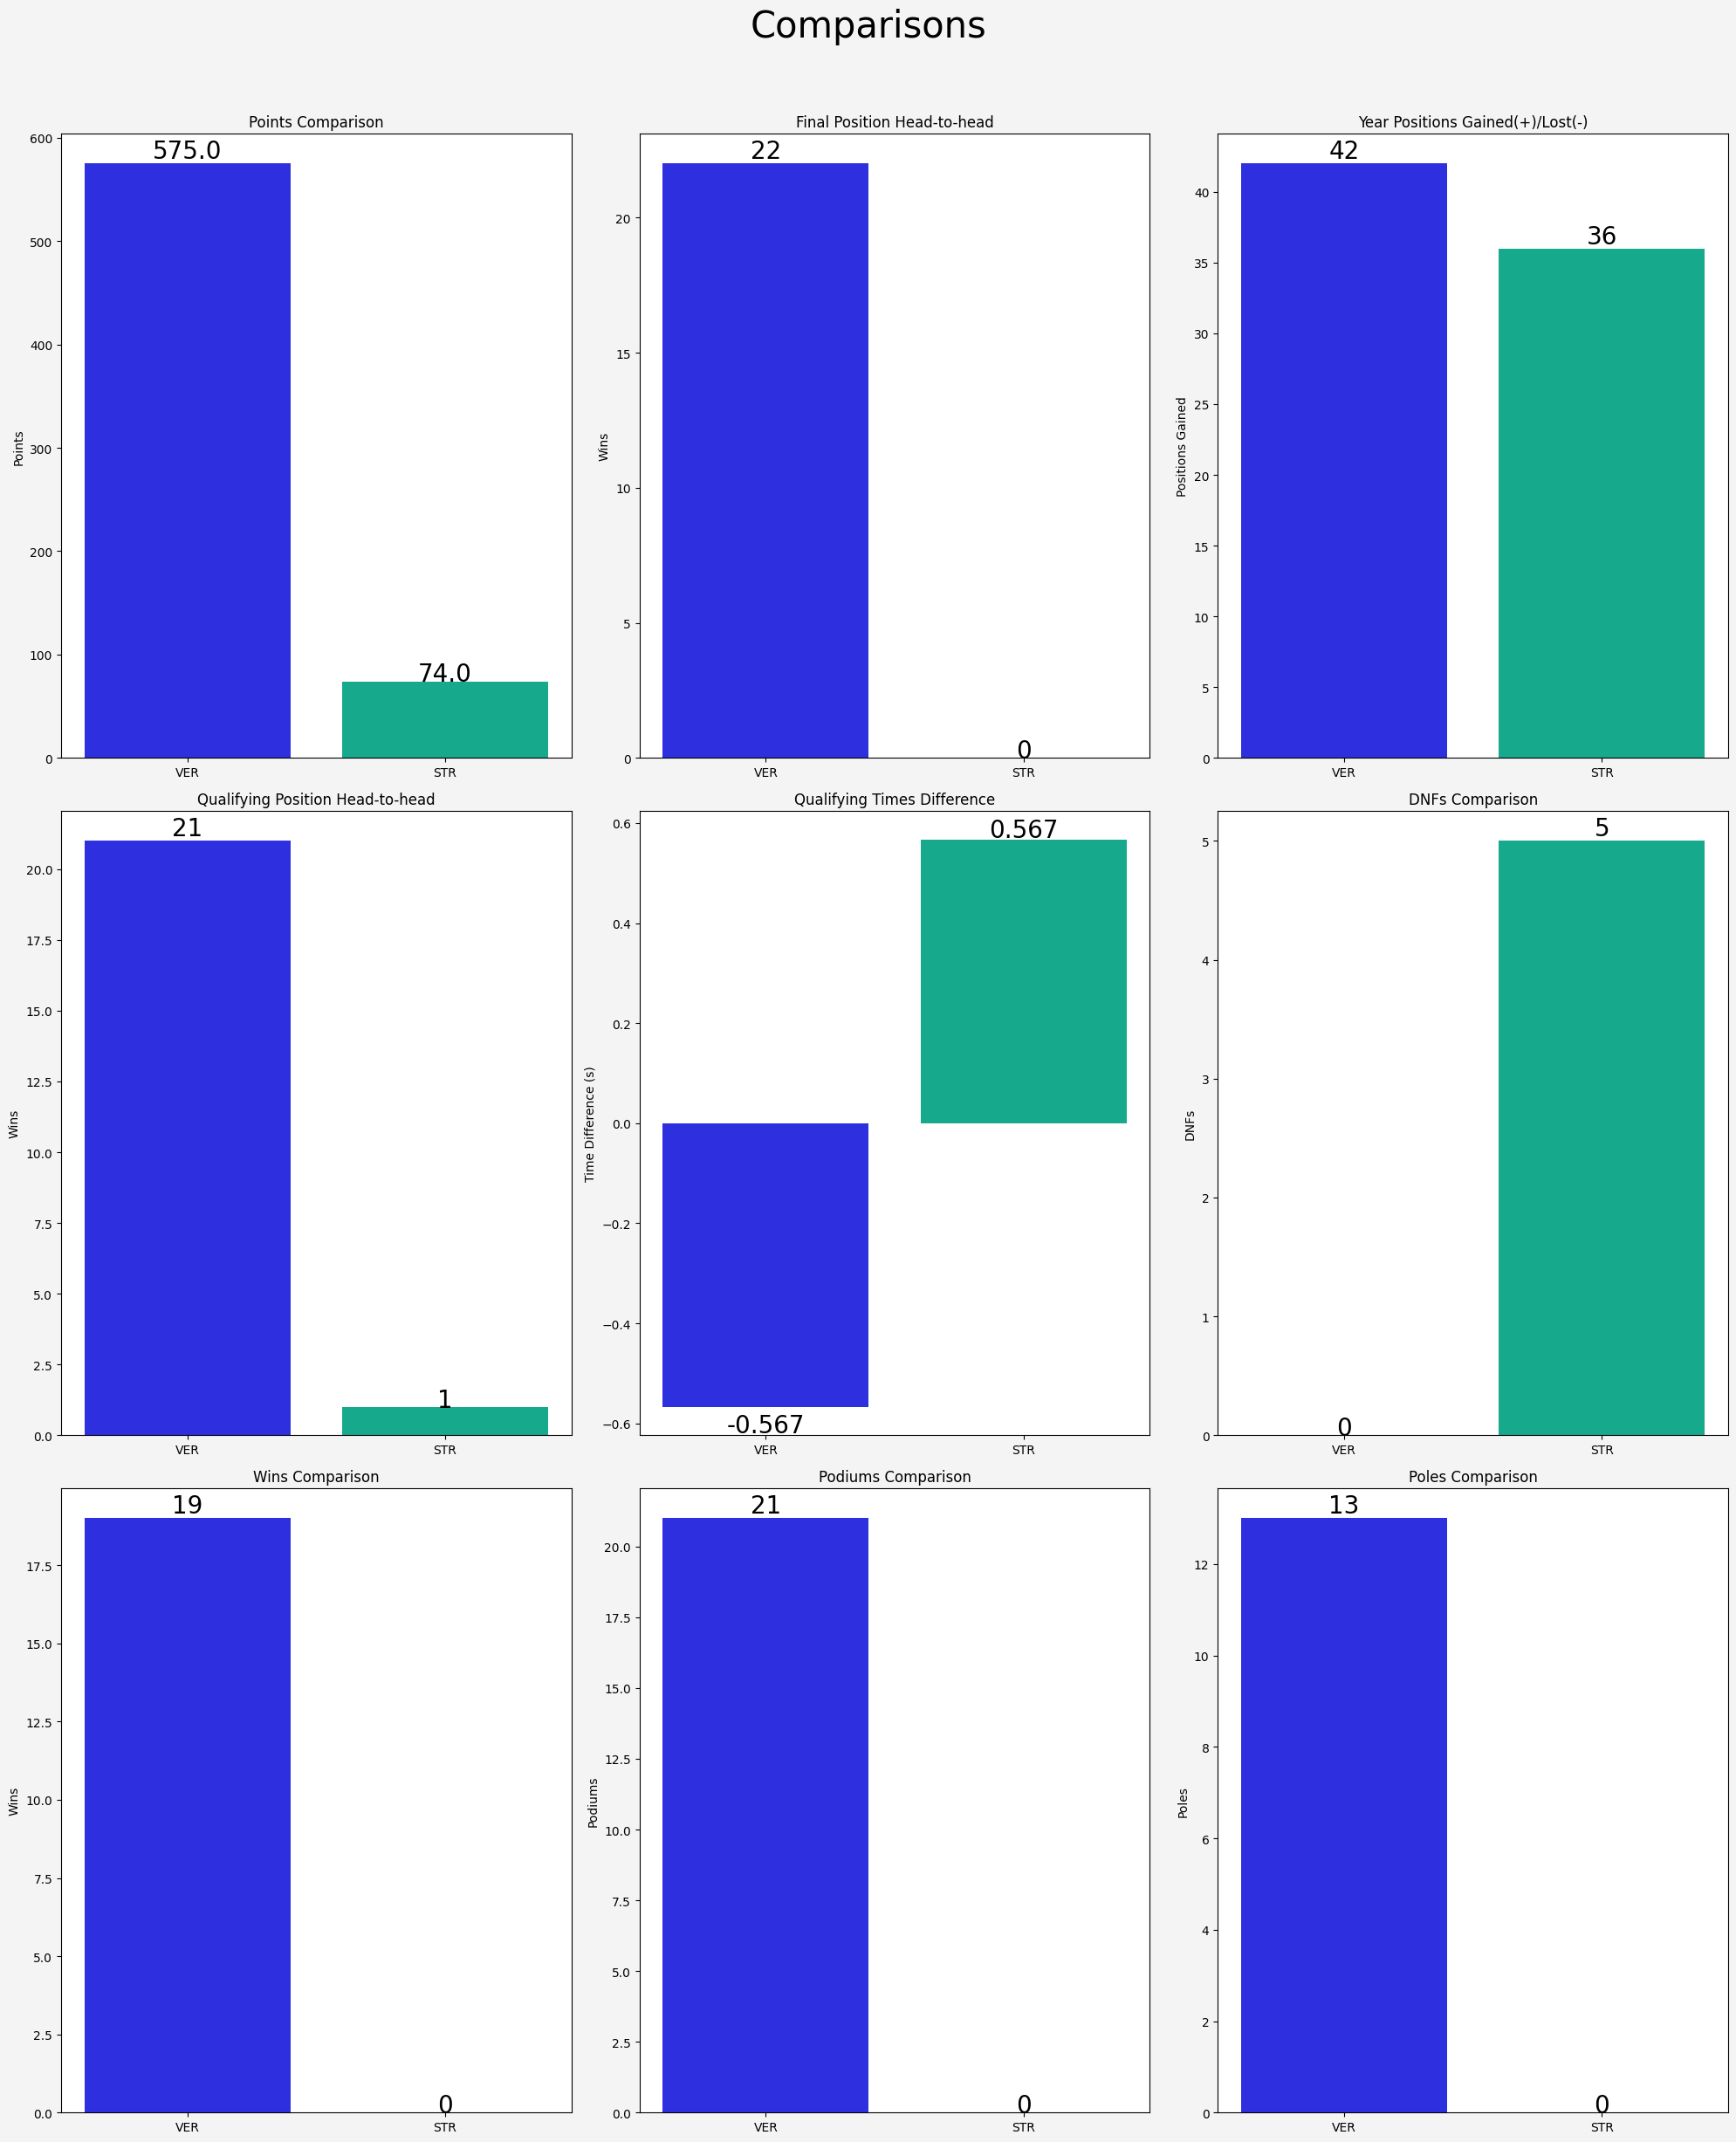

In [42]:
def plot_comparisons(comparisons, colors):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 25), facecolor='#f4f4f4')
    fig.suptitle('Comparisons', fontsize=30)

    # Points Comparison
    axes[0, 0].bar(comparisons['points_comp'].keys(), comparisons['points_comp'].values(), color = colors)
    axes[0, 0].set_title('Points Comparison')
    axes[0, 0].set_ylabel('Points')
    for i, v in enumerate(comparisons['points_comp'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[0, 0].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Final Position Head-to-head
    axes[0, 1].bar(comparisons['final_position_comp'].keys(), comparisons['final_position_comp'].values(), color = colors)
    axes[0, 1].set_title('Final Position Head-to-head')
    axes[0, 1].set_ylabel('Wins')
    for i, v in enumerate(comparisons['final_position_comp'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[0, 1].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Year Positions Gained(+)/Lost(-)
    axes[0, 2].bar(comparisons['year_positions_gained'].keys(), comparisons['year_positions_gained'].values(), color = colors)
    axes[0, 2].set_title('Year Positions Gained(+)/Lost(-)')
    axes[0, 2].set_ylabel('Positions Gained')
    for i, v in enumerate(comparisons['year_positions_gained'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[0, 2].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Qualifying Position Head-to-head
    axes[1, 0].bar(comparisons['quali_position_comp'].keys(), comparisons['quali_position_comp'].values(), color = colors)
    axes[1, 0].set_title('Qualifying Position Head-to-head')
    axes[1, 0].set_ylabel('Wins')
    for i, v in enumerate(comparisons['quali_position_comp'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[1, 0].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Qualifying Times Difference
    axes[1, 1].bar(comparisons['quali_diff'].keys(), comparisons['quali_diff'].values(), color = colors)
    axes[1, 1].set_title('Qualifying Times Difference')
    axes[1, 1].set_ylabel('Time Difference (s)')
    for i, v in enumerate(comparisons['quali_diff'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[1, 1].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # DNFs Comparison
    axes[1, 2].bar(comparisons['dnfs'].keys(), comparisons['dnfs'].values(), color = colors)
    axes[1, 2].set_title('DNFs Comparison')
    axes[1, 2].set_ylabel('DNFs')
    for i, v in enumerate(comparisons['dnfs'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[1, 2].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Wins Comparison
    axes[2, 0].bar(comparisons['wins'].keys(), comparisons['wins'].values(), color = colors)
    axes[2, 0].set_title('Wins Comparison')
    axes[2, 0].set_ylabel('Wins')
    for i, v in enumerate(comparisons['wins'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[2, 0].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Podiums Comparison
    axes[2, 1].bar(comparisons['podiums'].keys(), comparisons['podiums'].values(), color = colors)
    axes[2, 1].set_title('Podiums Comparison')
    axes[2, 1].set_ylabel('Podiums')
    for i, v in enumerate(comparisons['podiums'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[2, 1].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    # Poles Comparison
    axes[2, 2].bar(comparisons['poles'].keys(), comparisons['poles'].values(), color = colors)
    axes[2, 2].set_title('Poles Comparison')
    axes[2, 2].set_ylabel('Poles')
    for i, v in enumerate(comparisons['poles'].values()):
        offset = v * 0.01 if v > 0 else v*0.09
        axes[2, 2].text(i, v + offset, str(v), color='black', ha='center', fontsize=20)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_comparisons(comparisons, ['#2e30df', '#16a98c'])


## Ritmo medio

In [ ]:

def data_year_pace_driver(year):
    schedule = fastf1.get_event_schedule(year)
    races = schedule[schedule['EventName'].notna()]

    mean_diff_list = []
    team_drivers = {}
    driver_palette = {}
    driver_number = {}
    driver_line = {}

    for i in range(1, len(races)):
        race_name = races.loc[i, 'EventName']
        
        # Load race data
        race = fastf1.get_session(year, race_name, 'R')
        race.load()
        laps = race.laps.pick_quicklaps(1.15)

        # Transform lap time to seconds
        transformed_laps = laps.copy()
        transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

        # Calculate mean lap time
        drivers_time = transformed_laps[['LapNumber', 'Driver', 'LapTime (s)']]
        mean_laps = transformed_laps[["LapNumber", "LapTime (s)"]].groupby("LapNumber").mean()
        mean_laps.rename(columns={'LapTime (s)': 'MeanLapTime'}, inplace=True)

        drivers_difference = pd.merge(drivers_time, mean_laps, on='LapNumber', how="inner")
        drivers_difference['Difference'] = drivers_difference['LapTime (s)'] - drivers_difference['MeanLapTime']

        # Create a dictionary to map each driver to their team
        drivers = pd.DataFrame(data=transformed_laps[['Driver', 'Team']].groupby(['Driver'], as_index=False, sort=False).max())
        for _, row in drivers.iterrows():
            driver = row['Driver']
            team = row['Team']
            if team in team_drivers:
                if driver not in team_drivers[team]:
                    team_drivers[team].append(driver)
            else:
                team_drivers[team] = [driver]

        # Group by driver and calculate mean difference
        mean_diff_driver = drivers_difference[["Driver", "Difference"]].groupby("Driver").mean()["Difference"].sort_values()
        mean_diff_driver = pd.Series(data=mean_diff_driver, name=race_name)
        mean_diff_list.append(mean_diff_driver)

        for driver in list(mean_diff_driver.index):
            if driver not in driver_palette.keys():
                driver_palette[driver] = fastf1.plotting.get_driver_color(driver, race)
        
    for team in team_drivers.keys():
        n = 0
        for driver in team_drivers[team]:
            driver_number[driver] = n
            n += 1

    mean_diff_df = pd.concat(mean_diff_list, axis=1)

    # Assign line style
    for driver in driver_number.keys():
        if driver_number[driver] == 0:
            driver_line[driver] = '-'
        elif driver_number[driver] == 1:
            driver_line[driver] = '--'
        elif driver_number[driver] == 2:
            driver_line[driver] = '-.'
        elif driver_number[driver] >= 3:
            driver_line[driver] = ':'
        
    # Transpose dataframe
    df_ritmos = mean_diff_df.T  
    df_ritmos.to_csv(rf'.\data\bueno\{year}\Ritmos\Drivers\df_ritmos_{year}.csv')
    data = {
        "driver_palette": driver_palette,
        "driver_line": driver_line
    }

    with open(rf'.\data\bueno\{year}\Ritmos\Drivers\driver_info_{year}.json', 'w') as f:
        json.dump(data, f)

In [96]:
data_year_pace_driver(2023)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Pri

### Por piloto

In [ ]:

import pandas as pd
import json
import plotly.express as px

def plot_year_pace_driver(year):
    df_ritmos = pd.read_csv(rf'.\data\bueno\{year}\Ritmos\Drivers\df_ritmos_{year}.csv', index_col=0)
    
    with open(rf'.\data\bueno\{year}\Ritmos\Drivers\driver_info_{year}.json', 'r') as f:
        driver_info = json.load(f)
    driver_palette = driver_info['driver_palette']
    driver_line = driver_info['driver_line']

    driver_styles = {driver: {'color': driver_palette[driver], 'line': driver_line[driver]} for driver in driver_palette}
    
    # Ensure all columns are of the same type
    df_ritmos = df_ritmos.apply(pd.to_numeric, errors='coerce')
    fig = px.line(df_ritmos, x=df_ritmos.index, y=df_ritmos.columns, line_shape='linear',
                  labels={'value': 'Time Difference (seconds)', 'index': 'Circuits'}, 
                  title=f'Time Difference Progression Compared to Average Season {year}',
                  markers=True)

    fig.update_layout(xaxis_title='Circuits', yaxis_title='Time Difference (seconds)', 
                      legend_title='Driver', xaxis=dict(tickangle=-60), template='plotly_white')

    fig.update_yaxes(autorange='reversed')
    for driver, style in driver_styles.items():
        fig.update_traces(selector=dict(name=driver), line=dict(color=style['color'], dash=style['line'])) 
        fig.update_layout(width=1200, height=800)
    
    return fig



def plot_year_pace_team(year):
    df_ritmos = pd.read_csv(rf'.\data\bueno\{year}\Ritmos\Teams\df_ritmos_{year}.csv', index_col=0)
        
    with open(rf'.\data\bueno\{year}\Ritmos\Teams\team_info_{year}.json', 'r') as f:
        team_info = json.load(f)
    team_palette = team_info['team_palette']

    team_styles = {driver: {'color': team_palette[driver]} for driver in team_palette}

    df_ritmos = df_ritmos.apply(pd.to_numeric, errors='coerce')
    fig = px.line(df_ritmos, x=df_ritmos.index, y=df_ritmos.columns, line_shape='linear',
                  labels={'value': 'Time Difference (seconds)', 'index': 'Circuits'}, 
                  title=f'Time Difference Progression Compared to Average Season {year}',
                  markers=True)

    fig.update_layout(xaxis_title='Circuits', yaxis_title='Time Difference (seconds)', 
                      legend_title='Team', xaxis=dict(tickangle=-60), template='plotly_white')

    fig.update_yaxes(autorange='reversed')
    for driver, style in team_styles.items():
        fig.update_traces(selector=dict(name=driver), line=dict(color=style['color'])) 
        fig.update_layout(width=1200, height=800)

    # Show the plot
    return fig



In [150]:
plot_year_pace_team(2023)

In [148]:
plot_year_pace_driver(2023)

In [ ]:
## PERFORMANCE PLOTS

def year_pace_driver(year, drivers_to_comp='All'):
    schedule = fastf1.get_event_schedule(year)
    races = schedule[schedule['EventName'].notna()]

    mean_diff_list = []
    team_drivers = {}
    driver_palette = {}
    driver_number = {}
    driver_line = {}

    for i in range(1, len(races)):
        race_name = races.loc[i, 'EventName']
        
        # Load race data
        race = fastf1.get_session(year, race_name, 'R')
        race.load()
        laps = race.laps.pick_quicklaps()

        # Transform lap time to seconds
        transformed_laps = laps.copy()
        transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

        # Calculate mean lap time
        drivers_time = transformed_laps[['LapNumber', 'Driver', 'LapTime (s)']]
        mean_laps = transformed_laps[["LapNumber", "LapTime (s)"]].groupby("LapNumber").mean()
        mean_laps.rename(columns={'LapTime (s)': 'MeanLapTime'}, inplace=True)

        drivers_difference = pd.merge(drivers_time, mean_laps, on='LapNumber', how="inner")
        drivers_difference['Difference'] = drivers_difference['LapTime (s)'] - drivers_difference['MeanLapTime']

        # Create a dictionary to map each driver to their team
        drivers = pd.DataFrame(data=transformed_laps[['Driver', 'Team']].groupby(['Driver'], as_index=False, sort=False).max())
        for _, row in drivers.iterrows():
            driver = row['Driver']
            team = row['Team']
            if team in team_drivers:
                if driver not in team_drivers[team]:
                    team_drivers[team].append(driver)
            else:
                team_drivers[team] = [driver]

        # Group by driver and calculate mean difference
        mean_diff_driver = drivers_difference[["Driver", "Difference"]].groupby("Driver").mean()["Difference"].sort_values()
        mean_diff_driver = pd.Series(data=mean_diff_driver, name=race_name)
        mean_diff_list.append(mean_diff_driver)

        for driver in list(mean_diff_driver.index):
            if driver not in driver_palette.keys():
                driver_palette[driver] = fastf1.plotting.get_driver_color(driver, race)
        
    for team in team_drivers.keys():
        n = 0
        for driver in team_drivers[team]:
            driver_number[driver] = n
            n += 1

    mean_diff_df = pd.concat(mean_diff_list, axis=1)

    # Assign line style
    for driver in driver_number.keys():
        if driver_number[driver] == 0:
            driver_line[driver] = '-'
        elif driver_number[driver] == 1:
            driver_line[driver] = '--'
        elif driver_number[driver] == 2:
            driver_line[driver] = '-.'
        elif driver_number[driver] >= 3:
            driver_line[driver] = ':'
        
    # Transpose dataframe
    df_t = mean_diff_df.T  # Now the races are the index and the drivers are the columns


    #Create the plot 

    _, ax = plt.subplots(figsize=(25, 10))

    for piloto in df_t.columns:
        if isinstance(drivers_to_comp, str) and drivers_to_comp == 'All':
            # Draw a line for each driver
            ax.plot(df_t.index, df_t[piloto], label=piloto, 
                    linestyle=driver_line[piloto], linewidth=2,
                    marker='o', markeredgewidth=4, 
                    color=driver_palette[piloto]) 
        elif piloto in drivers_to_comp:
            ax.plot(df_t.index, df_t[piloto], label=piloto, 
                    linestyle=driver_line[piloto], linewidth=2,
                    marker='o', markeredgewidth=4, 
                    color=driver_palette[piloto]) 
    ax.set_xlabel('Circuits', fontsize=15)
    ax.set_ylabel('Time Difference (seconds)', fontsize=15)
    ax.set_title(f'Time Difference Progression Compared to Average Season {year}', fontsize=30)
    ax.set_xticks(range(len(races)-1), labels=df_t.index, rotation=75, fontsize=15)  # Rotate circuit labels if necessary
    ax.invert_yaxis()
    ax.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

    # Adjust layout to avoid overlaps
    ax.grid(True, axis='y')

    plt.savefig(f'.\APP\images\year_pace\{year}_pace_drivers.png')

    # Show the plot
    plt.show()



core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Pri

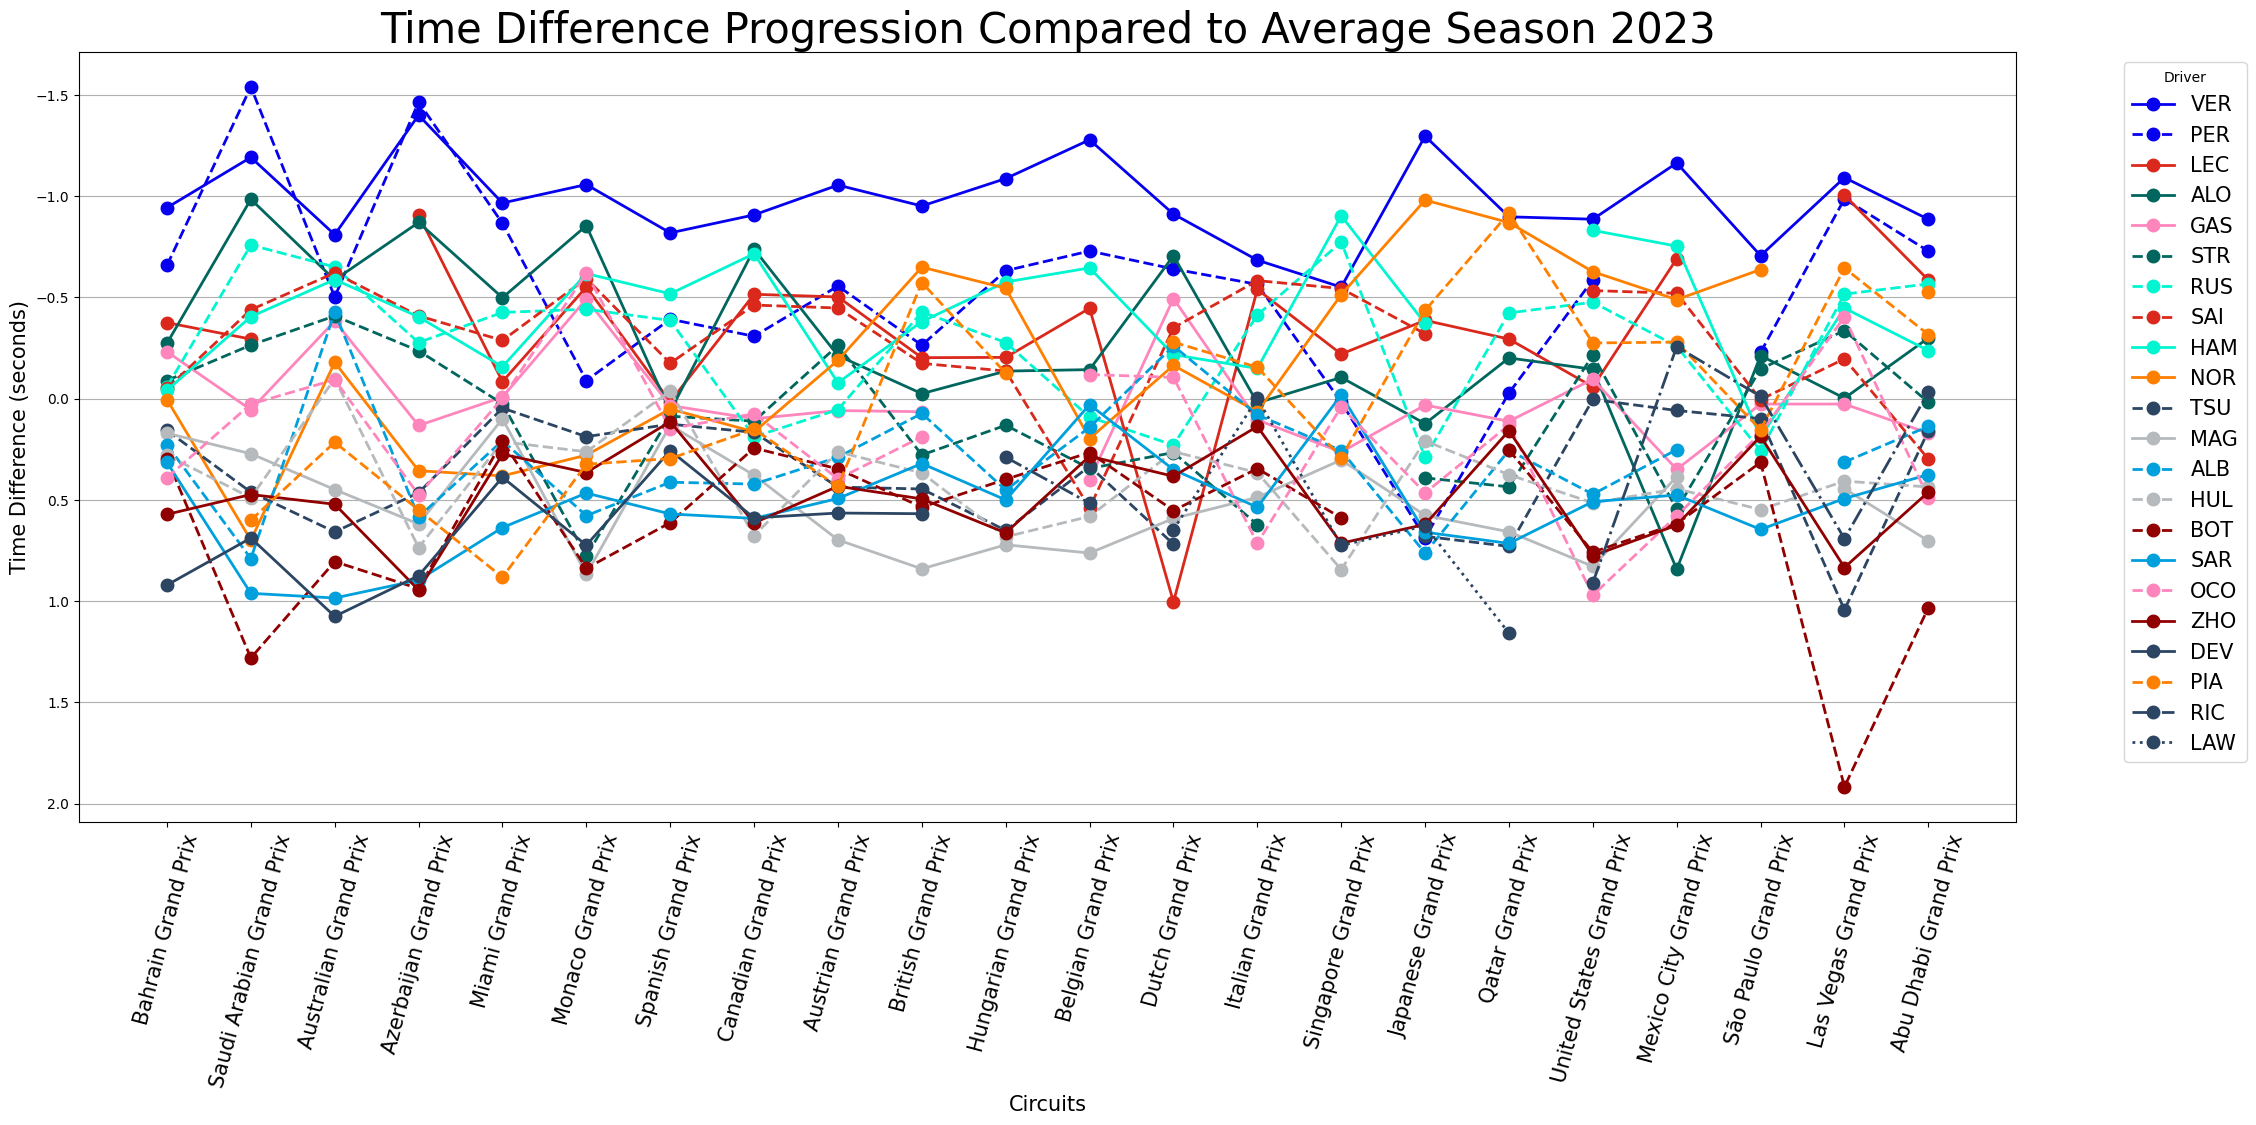

In [25]:
year_pace_driver(2023)

### Por equipo

In [ ]:

## PERFORMANCE PLOTS (calculating the "relative pace") of teams in a year
def year_pace_team(year, teams_to_comp='All'):
    schedule = fastf1.get_event_schedule(year)
    races = schedule[schedule['EventName'].notna()]

    mean_diff_list = []
    team_palette = {}
    team_number = {}
    team_line = {}

    for i in range(1, len(races)):
        race_name = races.loc[i, 'EventName']
        
        # Load race data
        race = fastf1.get_session(year, race_name, 'R')
        race.load()
        laps = race.laps.pick_quicklaps()

        # Transform lap time to seconds
        transformed_laps = laps.copy()
        transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

        # Calculate mean lap time
        teams_time = transformed_laps[['LapNumber', 'Team', 'LapTime (s)']]
        mean_laps = transformed_laps[["LapNumber", "LapTime (s)"]].groupby("LapNumber").mean()
        mean_laps.rename(columns={'LapTime (s)': 'MeanLapTime'}, inplace=True)

        teams_difference = pd.merge(teams_time, mean_laps, on='LapNumber', how="inner")
        teams_difference['Difference'] = teams_difference['LapTime (s)'] - teams_difference['MeanLapTime']

        # Group by team and calculate mean difference
        mean_diff_team = teams_difference[["Team", "Difference"]].groupby("Team").mean()["Difference"].sort_values()
        mean_diff_team = pd.Series(data=mean_diff_team, name=race_name)
        mean_diff_list.append(mean_diff_team)

        for team in list(mean_diff_team.index):
            if team not in team_palette.keys():
                team_palette[team] = fastf1.plotting.get_team_color(team, race)
        
    for team in mean_diff_team.index:
        team_number[team] = list(mean_diff_team.index).index(team)

    mean_diff_df = pd.concat(mean_diff_list, axis=1)

    # Assign line style
    for team in team_number.keys():
        if team_number[team] == 0:
            team_line[team] = '-'
        elif team_number[team] == 1:
            team_line[team] = '--'
        elif team_number[team] == 2:
            team_line[team] = '-.'
        elif team_number[team] >= 3:
            team_line[team] = ':'
        
    # Transpose dataframe
    df_t = mean_diff_df.T  # Now the races are the index and the teams are the columns

    # Create the plot
    fig, ax = plt.subplots(figsize=(25, 10))

    for team in df_t.columns:
        if isinstance(teams_to_comp, str) and teams_to_comp == 'All':
            # Draw a line for each team
            ax.plot(df_t.index, df_t[team], label=team, 
                    linestyle=team_line[team], linewidth=2,
                    marker='o', markeredgewidth=4, 
                    color=team_palette[team]) 
        elif team in teams_to_comp:
            ax.plot(df_t.index, df_t[team], label=team, 
                    linestyle=team_line[team], linewidth=2,
                    marker='o', markeredgewidth=4, 
                    color=team_palette[team]) 
    ax.set_xlabel('Circuits', fontsize=15)
    ax.set_ylabel('Time Difference (seconds)', fontsize=15)
    ax.set_title(f'Time Difference Progression Compared to Average Season {year}', fontsize=30)
    ax.set_xticks(range(len(races)-1), labels=df_t.index, rotation=75, fontsize=15)  # Rotate circuit labels if necessary
    ax.invert_yaxis()
    ax.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

    # Adjust layout to avoid overlaps
    ax.grid(True, axis='y')

    #Save the plot
    plt.savefig(f'.\APP\images\year_pace\{year}_pace_teams.png')
    # Show the plot
    plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
req            INFO 	Using cached data for driver_info
core  

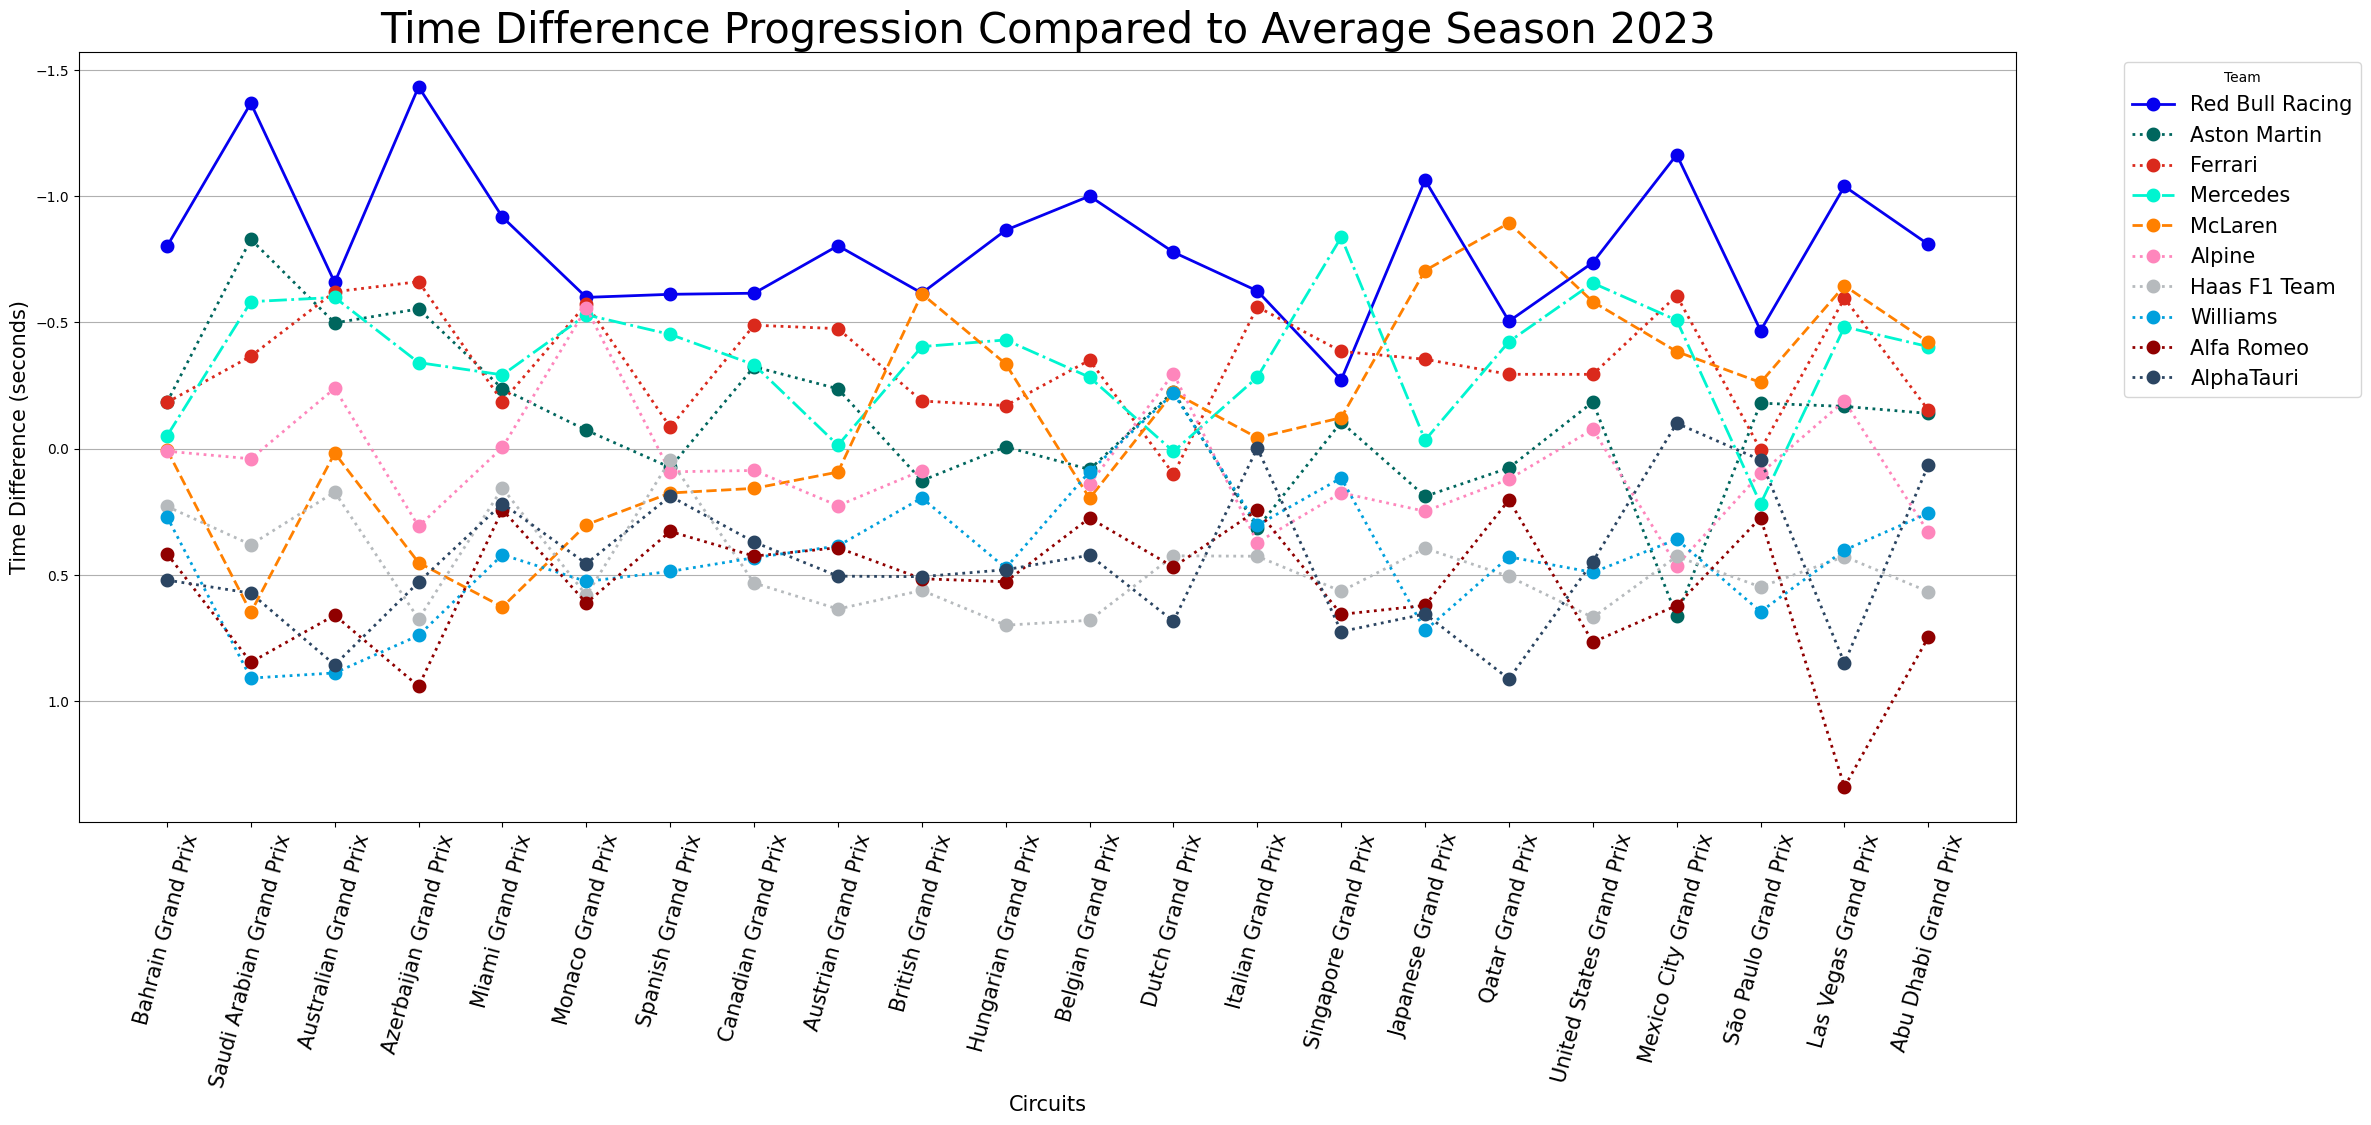

In [19]:
year_pace_team(2023)

## Heatmap puntos

### Piloto

In [ ]:

#Heatmap with points per race of each driver (sns)
def season_points_heatmap(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)  # Races in year 2022
    results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():

        temp = ergast.get_race_results(season=year, round=rnd + 1)
        temp = temp.content[0]

        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=year, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
            # Add sprint points and race points to get the total
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        # Add round no. and grand prix name
        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  # Keep useful cols.
        results.append(temp)

    # Append all races into a single dataframe
    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    results = results.pivot(index='driverCode', columns='round', values='points')

    # Rank the drivers by their total points
    results['Total'] = results.sum(axis=1)
    results = results.sort_values(by='Total', ascending=False)

    # Use race name, instead of round no., as column names
    results.columns = list(races) + ['Total']

    #Set cmap boundaries
    zmin = results.iloc[:, :-1].min().min()
    zmax = results.iloc[:, :-1].max().max()

    # Define the colors
    colors = ['#ffffff', '#00d5ea']

    # Create the colormap
    cmap = LinearSegmentedColormap.from_list('custom_gradient', colors)

    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(results, annot=True, fmt=".0f", cmap=cmap, cbar=False, linewidths=.5, vmin=zmin, vmax=zmax)

    # Set the title and labels
    plt.title(f'{year} Driver Points by Race', fontsize=16)
    plt.xlabel('Race', fontsize=12)
    plt.ylabel('Driver', fontsize=12)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout to avoid clipping
    plt.tight_layout()

    #Save the plot
    plt.savefig(f'.\APP\images\{year}_drivers_points_heatmap.png')

    # Show the plot
    plt.show()


#Heatmap with points per race of each driver (plotly)
def season_points_heatmap_plotly(year):
    year = 2023

    ergast = Ergast()
    races = ergast.get_race_schedule(year)  # Races in year 2022
    results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():

        temp = ergast.get_race_results(season=year, round=rnd + 1)
        temp = temp.content[0]

        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=year, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint.content[0], on='driverCode', how='left')
            # Add sprint points and race points to get the total
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        # Add round no. and grand prix name
        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'driverCode', 'points']]  # Keep useful cols.
        results.append(temp)

    # Append all races into a single dataframe
    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    results = results.pivot(index='driverCode', columns='round', values='points')

    # Rank the drivers by their total points
    results['Total'] = results.sum(axis=1)
    results = results.sort_values(by='Total', ascending=False)

    # Use race name, instead of round no., as column names
    results.columns = list(races) + ['Total']

    # Exclude the 'Total' column from the color scale
    zmin = results.iloc[:, :-1].min().min()
    zmax = results.iloc[:, :-1].max().max()

    fig = px.imshow(
        results,
        text_auto=True,
        aspect='auto',  # Automatically adjust the aspect ratio
        color_continuous_scale=[[0,    'rgb(255, 255, 255 )'],  # Blue scale,
                                [1,    'rgb(0, 213, 234 )']],
        labels={'x': 'Race',
                'y': 'Driver',
                'color': 'Points'},       # Change hover texts
        zmin=zmin,
        zmax=zmax
    )
    fig.update_xaxes(title_text='')      # Remove axis titles
    fig.update_yaxes(title_text='')
    fig.update_yaxes(tickmode='linear')  # Show all ticks, i.e. driver names
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
                    showline=False,
                    tickson='boundaries')              # Show horizontal grid only
    fig.update_xaxes(showgrid=False, showline=False)    # And remove vertical grid
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')     # White background
    fig.update_layout(coloraxis_showscale=False)        # Remove legend
    fig.update_layout(xaxis=dict(side='top'))           # x-axis on top
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  # Remove border margins
    fig
    show(fig)
        

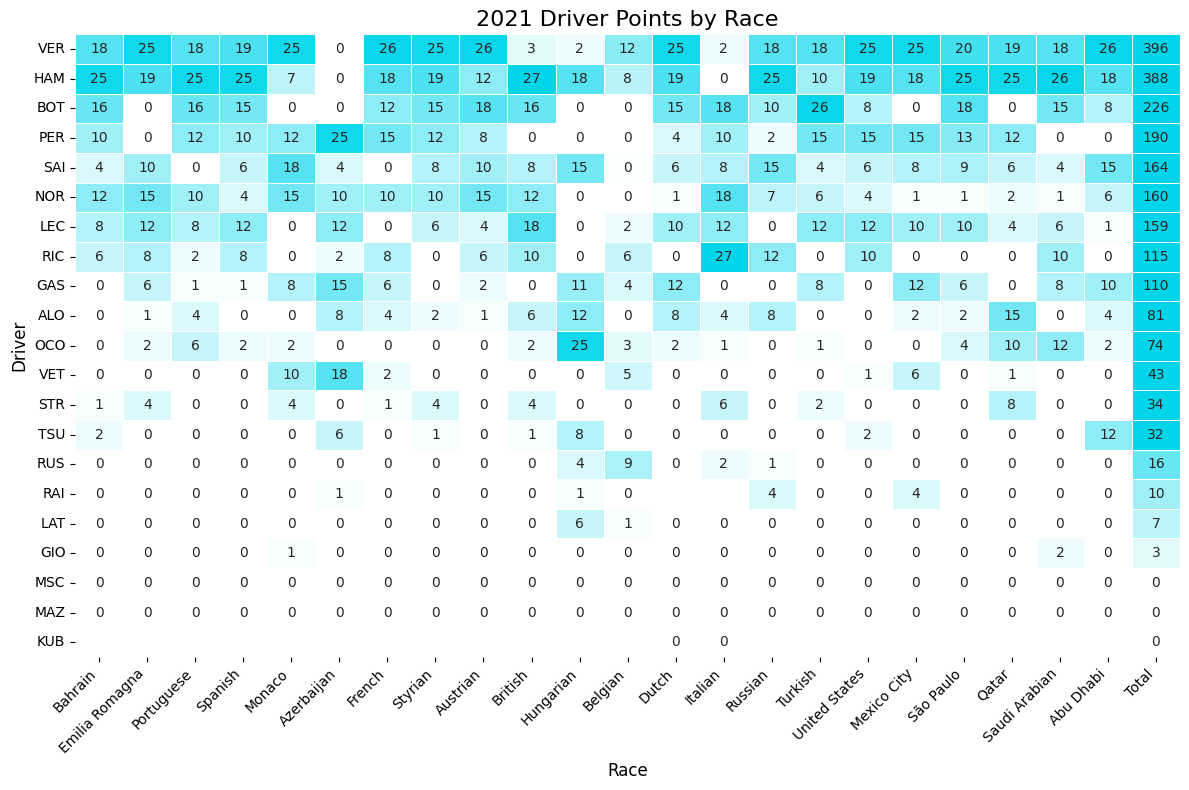

In [16]:
season_points_heatmap(2021)

In [26]:
season_points_heatmap_plotly(2023)

NameError: name 'season_points_heatmap_plotly' is not defined

### Equipo

In [ ]:
def season_points_heatmap_by_team(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)
    results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():
        temp = ergast.get_race_results(season=year, round=rnd + 1)
        temp = temp.content[0]

        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=year, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint.content[0], on='constructorName', how='left')
            # Add sprint points and race points to get the total
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        # Add round no. and grand prix name
        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'constructorName', 'points']]  # Keep useful cols.
        results.append(temp)

    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    results.reset_index(drop=True, inplace=True)
    
    results_team = results.groupby(['constructorName', 'race'])['points'].sum().unstack().fillna(0)


    # Rank the drivers by their total points
    results_team['Total'] = results_team.sum(axis=1)
    results_team = results_team.sort_values(by='Total', ascending=False)

    # Use race name, instead of round no., as column names
    results_team.columns = list(races) + ['Total']

    #Set cmap boundaries
    zmin = results_team.iloc[:, :-1].min().min()
    zmax = results_team.iloc[:, :-1].max().max()

    # Define the colors
    colors = ['#ffffff', '#00d5ea']

    # Create the colormap
    cmap = LinearSegmentedColormap.from_list('custom_gradient', colors)

    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(results_team, annot=True, fmt=".0f", cmap=cmap, cbar=False, linewidths=.5, vmin=zmin, vmax=zmax)

    # Set the title and labels
    plt.title(f'{year} Team Points by Race', fontsize=16)
    plt.xlabel('Race', fontsize=12)
    plt.ylabel('Team', fontsize=12)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout to avoid clipping
    plt.tight_layout()

    plt.savefig(f'.\APP\images\{year}_teams_points_heatmap.png')

    # Show the plot
    plt.show()

def season_points_heatmap_by_team_plotly(year):
    ergast = Ergast()
    races = ergast.get_race_schedule(year)
    results = []

    # For each race in the season
    for rnd, race in races['raceName'].items():
        temp = ergast.get_race_results(season=year, round=rnd + 1)
        temp = temp.content[0]

        # If there is a sprint, get the results as well
        sprint = ergast.get_sprint_results(season=year, round=rnd + 1)
        if sprint.content and sprint.description['round'][0] == rnd + 1:
            temp = pd.merge(temp, sprint.content[0], on='constructorName', how='left')
            # Add sprint points and race points to get the total
            temp['points'] = temp['points_x'] + temp['points_y']
            temp.drop(columns=['points_x', 'points_y'], inplace=True)

        # Add round no. and grand prix name
        temp['round'] = rnd + 1
        temp['race'] = race.removesuffix(' Grand Prix')
        temp = temp[['round', 'race', 'constructorName', 'points']]  # Keep useful cols.
        results.append(temp)

    results = pd.concat(results)
    races = results['race'].drop_duplicates()

    results.reset_index(drop=True, inplace=True)
    
    results_team = results.groupby(['constructorName', 'race'])['points'].sum().unstack().fillna(0)


    # Rank the drivers by their total points
    results_team['Total'] = results_team.sum(axis=1)
    results_team = results_team.sort_values(by='Total', ascending=False)

    # Use race name, instead of round no., as column names
    results_team.columns = list(races) + ['Total']

    #Set cmap boundaries
    zmin = results_team.iloc[:, :-1].min().min()
    zmax = results_team.iloc[:, :-1].max().max()

    fig = px.imshow(
        results_team,
        text_auto=True,
        aspect='auto',  # Automatically adjust the aspect ratio
        color_continuous_scale=[[0,    'rgb(255, 255, 255 )'],  # Blue scale,
                                [1,    'rgb(0, 213, 234 )']],
        labels={'x': 'Race',
                'y': 'Team',
                'color': 'Points'},       # Change hover texts
        zmin=zmin,
        zmax=zmax
    )
    fig.update_xaxes(title_text='')      # Remove axis titles
    fig.update_yaxes(title_text='')
    fig.update_yaxes(tickmode='linear')  # Show all ticks, i.e. driver names
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey',
                    showline=False,
                    tickson='boundaries')              # Show horizontal grid only
    fig.update_xaxes(showgrid=False, showline=False)    # And remove vertical grid
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')     # White background
    fig.update_layout(coloraxis_showscale=False)        # Remove legend
    fig.update_layout(xaxis=dict(side='top'))           # x-axis on top
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))  # Remove border margins
    fig
    show(fig)
        

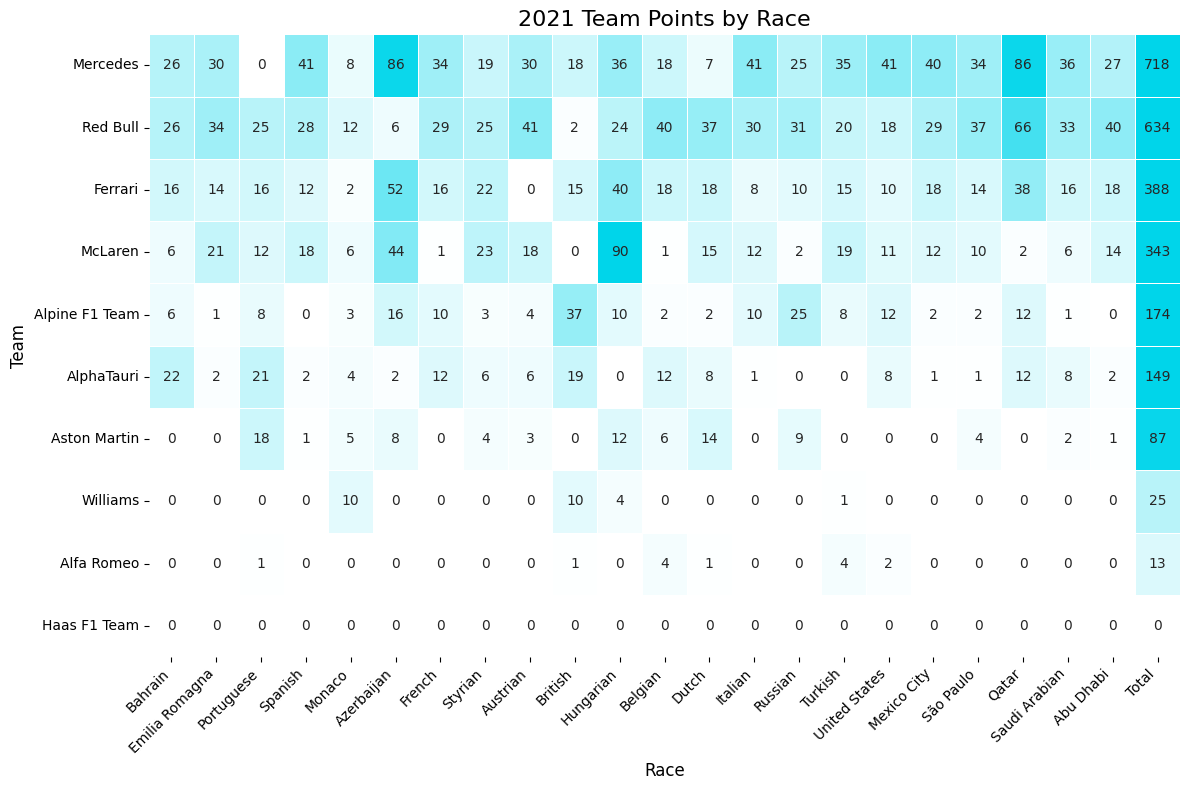

In [17]:
season_points_heatmap_by_team(2021)

In [79]:
season_points_heatmap_by_team_plotly(2023)


# Grand Prixs

## Resultados de un GP


### Custom plots

In [39]:

def data_overlap_telemetries(year, event):
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    drivers = session.laps.Driver.unique()
    drivers_style = {}

    telemetries = {}
    laptimes = {}

    for driver in drivers:
        lap = session.laps.pick_driver(driver).pick_fastest()
        laptime = lap['LapTime'].total_seconds()
        laptime = pd.to_timedelta(laptime, unit='s')
        minutes = int(laptime.total_seconds() // 60)
        seconds = int(laptime.total_seconds() % 60)
        milliseconds = int(laptime.microseconds // 1000)

        # Format as Minutes:Seconds.Milliseconds
        readable_format = f"{minutes:02}:{seconds:02}.{milliseconds:03}"

        #obtain the Abbreaviation of the driver from the driver number
        

        laptimes[driver] = readable_format
        telemetry = lap.get_car_data().add_distance()
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=session)
        drivers_style[driver] = style

        telemetries[driver] = telemetry[['Distance', 'Speed', 'Throttle', 'Brake']].copy()

    telemetries_path = rf'.\data\bueno\{year}\telemetries\{event}_telemetries.json'
    styles_path = rf'.\data\bueno\{year}\telemetries\{event}_styles.json'
    laps_path = rf'.\data\bueno\{year}\telemetries\{event}_laptimes.json'

    # Ensure the directory exists
    os.makedirs(os.path.dirname(telemetries_path), exist_ok=True)

    # Convert telemetries to a serializable format
    telemetries_serializable = {driver: telemetry.to_dict(orient='list') for driver, telemetry in telemetries.items()}

    # Save telemetries to json
    with open(telemetries_path, 'w') as f:
        json.dump(telemetries_serializable, f)

    # Save styles to json
    with open(styles_path, 'w') as f:
        json.dump(drivers_style, f)

    with open(laps_path, 'w') as f:
        json.dump(laptimes, f)

In [40]:
data_overlap_telemetries(2023, 'Monaco Grand Prix')

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
req            INFO 	Using cached data for driver_info


In [36]:


def plot_overlap_telemetries(year, event):
    # Load telemetries from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_telemetries.json', 'r') as f:
        telemetries = json.load(f)

    # Convert telemetries back to DataFrame
    telemetries = {driver: pd.DataFrame(data) for driver, data in telemetries.items()}

    # Load styles from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_styles.json', 'r') as f:
        drivers_style = json.load(f)

    with open(rf'.\data\bueno\{year}\telemetries\{event}_laptimes.json', 'r') as f:
        laptimes = json.load(f)


    # drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}

    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Speed', 'Throttle', 'Brake'))

    for driver, telemetry in telemetries.items():
        style = drivers_style.get(driver, {})
        color = style.get('color', 'black')  # Color por defecto: negro
        dash_style = 'dash' if style.get('linestyle') == 'dashed' else 'solid'
        telemetry = telemetries[driver]
        
        fig.add_trace(
            go.Scatter(
                x=[None], y=[None],  # Puntos ficticios
                mode='lines', name=str(str(driver) + ' (' + laptimes[driver] + ')'),  # Solo muestra el nombre del piloto
                line=dict(color=color, dash=dash_style),
                legendgroup=driver, visible='legendonly' # Agrupar por piloto
            )
        )
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Speed'],
              mode='lines', name=f"{driver} Speed", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=1, col=1)
        
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Throttle'], 
            mode='lines', name=f"{driver} Throttle", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=2, col=1)
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Brake'], 
            mode='lines', name=f"{driver} Brake", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False , visible='legendonly'), row=3, col=1)

    fig.update_layout(height=1500, width=1200, title_text=f'Telemetry Comparison - {event} {year}', 
                      showlegend=True, legend_title='Driver', template='plotly_white')
    fig.update_xaxes(title_text='Distance (m)')
    fig.update_yaxes(title_text='Speed (km/h)', row=1, col=1)
    fig.update_yaxes(title_text='Throttle (%)', row=2, col=1)
    fig.update_yaxes(title_text='Brake (%)', row=3, col=1)

    fig.show()

    
    # 

In [43]:
plot_overlap_telemetries(2023, 'Monaco Grand Prix')

In [ ]:
#Overlap speed, throttle and brake telemetry of the qualifying lap
def overlap_telemetry_quali(year, event, drivers_to_comp):
    # load a session and its telemetry data
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    laptimes = {}
    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20), facecolor='#f4f4f4')

    for driver in drivers_to_comp:
        lap = session.laps.pick_driver(driver).pick_fastest()
        laptime = lap['LapTime'].total_seconds()
        laptime = pd.to_timedelta(laptime, unit='s')
        minutes = int(laptime.total_seconds() // 60)
        seconds = int(laptime.total_seconds() % 60)
        milliseconds = int(laptime.microseconds // 1000)

        # Format as Minutes:Seconds.Milliseconds
        readable_format = f"{minutes:02}:{seconds:02}.{milliseconds:03}"

        laptimes[driver] = readable_format
        telemetry = lap.get_car_data().add_distance()
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=session)

        ax1.plot(telemetry['Distance'], telemetry['Speed'], label=f"{driver}", **style)
        ax2.plot(telemetry['Distance'], telemetry['Throttle'], label=f"{driver}", **style)
        ax3.plot(telemetry['Distance'], telemetry['Brake'], label=f"{driver}", **style)
    
    ax1.set_xlabel('Distance in m', color='black')
    ax1.set_ylabel('Speed in km/h', color='black')
    ax1.legend()
    ax1.set_title(f"Speed Comparison \n {session.event['EventName']} {session.event.year} Qualifying", fontsize=30, color='black')
    ax1.set_facecolor('#f4f4f4')
    ax1.tick_params(axis='x', colors='black')
    ax1.tick_params(axis='y', colors='black')

    ax2.set_xlabel('Distance in m', color='black')
    ax2.set_ylabel('Throttle', color='black')
    ax2.legend()
    ax2.set_title(f"Throttle Comparison \n {session.event['EventName']} {session.event.year} Qualifying", fontsize=30, color='black')
    ax2.set_facecolor('#f4f4f4')
    ax2.tick_params(axis='x', colors='black')
    ax2.tick_params(axis='y', colors='black')

    ax3.set_xlabel('Distance in m', color='black')
    ax3.set_ylabel('Brake', color='black')
    ax3.legend()
    ax3.set_title(f"Brake Comparison \n {session.event['EventName']} {session.event.year} Qualifying", fontsize=30, color='black')
    ax3.set_facecolor('#f4f4f4')
    ax3.tick_params(axis='x', colors='black')
    ax3.tick_params(axis='y', colors='black')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.tight_layout()


    for ax in [ax1, ax2, ax3]:
        for spine in ax.spines.values():
            spine.set_linewidth(0.5)
    plt.show()
    



#Compare lap times of the drivers
def drivers_laptimes_comp(year, event, drivers):
    # fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')
    race = fastf1.get_session(year, event, 'R')
    race.load()
    
    _, ax = plt.subplots(figsize=(16, 6), facecolor='#f4f4f4')

    
    for driver in drivers:
        laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()
        laps['LapTime']=laps['LapTime'].dt.total_seconds()
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=race)
        ax.plot(laps.index + 1, laps['LapTime'], marker='o', **style, label=driver)

    # Add axis labels and a legend
    ax.set_xlabel("Lap Number", color='black')
    ax.set_ylabel("Lap Time", color='black')
    ax.legend()
    ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.2)
    ax.set_facecolor('#f4f4f4')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.set_title(f"Lap Times Comparison for {event} - {year}", fontsize=30, color='black')

    # Format yticks as MM:SS.ms
    def format_func(value, tick_number):
        mins, secs = divmod(value, 60)
        return f'{int(mins):02d}:{secs:05.3f}'

    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

    plt.show()



In [6]:
def data_laptimes_race(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()
    drivers = race.laps.Driver.unique()

    drivers_style = {}
    all_lap_times = {}
    for driver in drivers:
        laps = race.laps.pick_driver(driver).pick_quicklaps(2).reset_index()
        laps['LapTime']=laps['LapTime'].dt.total_seconds()
        lap_times = laps[['LapNumber', 'LapTime']]
        all_lap_times[driver] = lap_times
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=race)
        drivers_style[driver] = style

    lap_times_path = rf'.\data\bueno\{year}\laptimes\{event}_laptimes.json'
    styles_path = rf'.\data\bueno\{year}\laptimes\{event}_styles.json'

    # Convert telemetries to a serializable format
    all_lap_times_serializable = {driver: lap_times.to_dict(orient='list') for driver, lap_times in all_lap_times.items()}

    # Ensure the directory exists
    os.makedirs(os.path.dirname(lap_times_path), exist_ok=True)

    # Save telemetries to json
    with open(lap_times_path, 'w') as f:
        json.dump(all_lap_times_serializable, f)

    # Save styles to json
    with open(styles_path, 'w') as f:
        json.dump(drivers_style, f)



In [7]:
data_laptimes_race(2023, 'British Grand Prix')

req         WARNING 	DEFAULT CACHE ENABLED! (6.43 GB) C:\Users\Usuario\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', 

In [ ]:


def plot_overlap_telemetries(year, event):
    # Load telemetries from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_telemetries.json', 'r') as f:
        telemetries = json.load(f)

    # Convert telemetries back to DataFrame
    telemetries = {driver: pd.DataFrame(data) for driver, data in telemetries.items()}

    # Load styles from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_styles.json', 'r') as f:
        drivers_style = json.load(f)

    with open(rf'.\data\bueno\{year}\telemetries\{event}_laptimes.json', 'r') as f:
        laptimes = json.load(f)


    # drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}

    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Speed', 'Throttle', 'Brake'))

    for driver, telemetry in telemetries.items():
        style = drivers_style.get(driver, {})
        color = style.get('color', 'black')  # Color por defecto: negro
        dash_style = 'dash' if style.get('linestyle') == 'dashed' else 'solid'
        telemetry = telemetries[driver]
        
        fig.add_trace(
            go.Scatter(
                x=[None], y=[None],  # Puntos ficticios
                mode='lines', name=str(str(driver) + ' (' + laptimes[driver] + ')'),  # Solo muestra el nombre del piloto
                line=dict(color=color, dash=dash_style),
                legendgroup=driver, visible='legendonly' # Agrupar por piloto
            )
        )
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Speed'],
              mode='lines', name=f"{driver} Speed", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=1, col=1)
        
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Throttle'], 
            mode='lines', name=f"{driver} Throttle", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=2, col=1)
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Brake'], 
            mode='lines', name=f"{driver} Brake", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False , visible='legendonly'), row=3, col=1)

    fig.update_layout(height=1500, width=1200, title_text=f'Telemetry Comparison - {event} {year}', 
                      showlegend=True, legend_title='Driver', template='plotly_white')
    fig.update_xaxes(title_text='Distance (m)')
    fig.update_yaxes(title_text='Speed (km/h)', row=1, col=1)
    fig.update_yaxes(title_text='Throttle (%)', row=2, col=1)
    fig.update_yaxes(title_text='Brake (%)', row=3, col=1)

    fig.show()

    
    # 

In [75]:
def plot_laptimes_race(year, event):
    with open(rf'.\data\bueno\{year}\laptimes\{event}_laptimes.json', 'r') as f:
        all_lap_times = json.load(f)

    all_lap_times = {driver: pd.DataFrame(data) for driver, data in all_lap_times.items()}

    with open(rf'.\data\bueno\{year}\laptimes\{event}_styles.json', 'r') as f:
        drivers_style = json.load(f)

    fig = px.line(width=1200, height=800) 

    for driver, lap_times in all_lap_times.items():
        style = drivers_style.get(driver, {})
        color = style.get('color', 'black')
        dash_style = 'dash' if style.get('linestyle') == 'dashed' else 'solid'
        
        fig.add_scatter(x=lap_times['LapNumber'], y=lap_times['LapTime'], mode='lines+markers', name=driver,
                        line=dict(color=color, dash=dash_style), visible='legendonly')

    fig.update_layout(title={'text': f"Lap Times Comparison for {event} - {year}",
                             'x': 0.5,
                             'xanchor': 'center'},
                      xaxis_title="Lap Number",
                      yaxis_title="Lap Time",
                      template='plotly_white', legend_title='Driver')
    
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(autorange='reversed')
    return fig

        


In [ ]:
#Compare lap times of the drivers
def drivers_laptimes_comp(year, event, drivers):
    race = fastf1.get_session(year, event, 'R')
    race.load()
    
    _, ax = plt.subplots(figsize=(16, 6), facecolor='#f4f4f4')

    
    for driver in drivers:
        laps = race.laps.pick_driver(driver).pick_laps().reset_index()
        laps['LapTime']=laps['LapTime'].dt.total_seconds()
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=race)
        ax.plot(laps.index + 1, laps['LapTime'], marker='o', **style, label=driver)

    # Add axis labels and a legend
    ax.set_xlabel("Lap Number", color='black')
    ax.set_ylabel("Lap Time", color='black')
    ax.legend()
    ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.2)
    ax.set_facecolor('#f4f4f4')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.set_title(f"Lap Times Comparison for {event} - {year}", fontsize=30, color='black')

    # Format yticks as MM:SS.ms
    def format_func(value, tick_number):
        mins, secs = divmod(value, 60)
        return f'{int(mins):02d}:{secs:05.3f}'

    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

    plt.show()


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
req            INFO 	Using cached data for driver_info


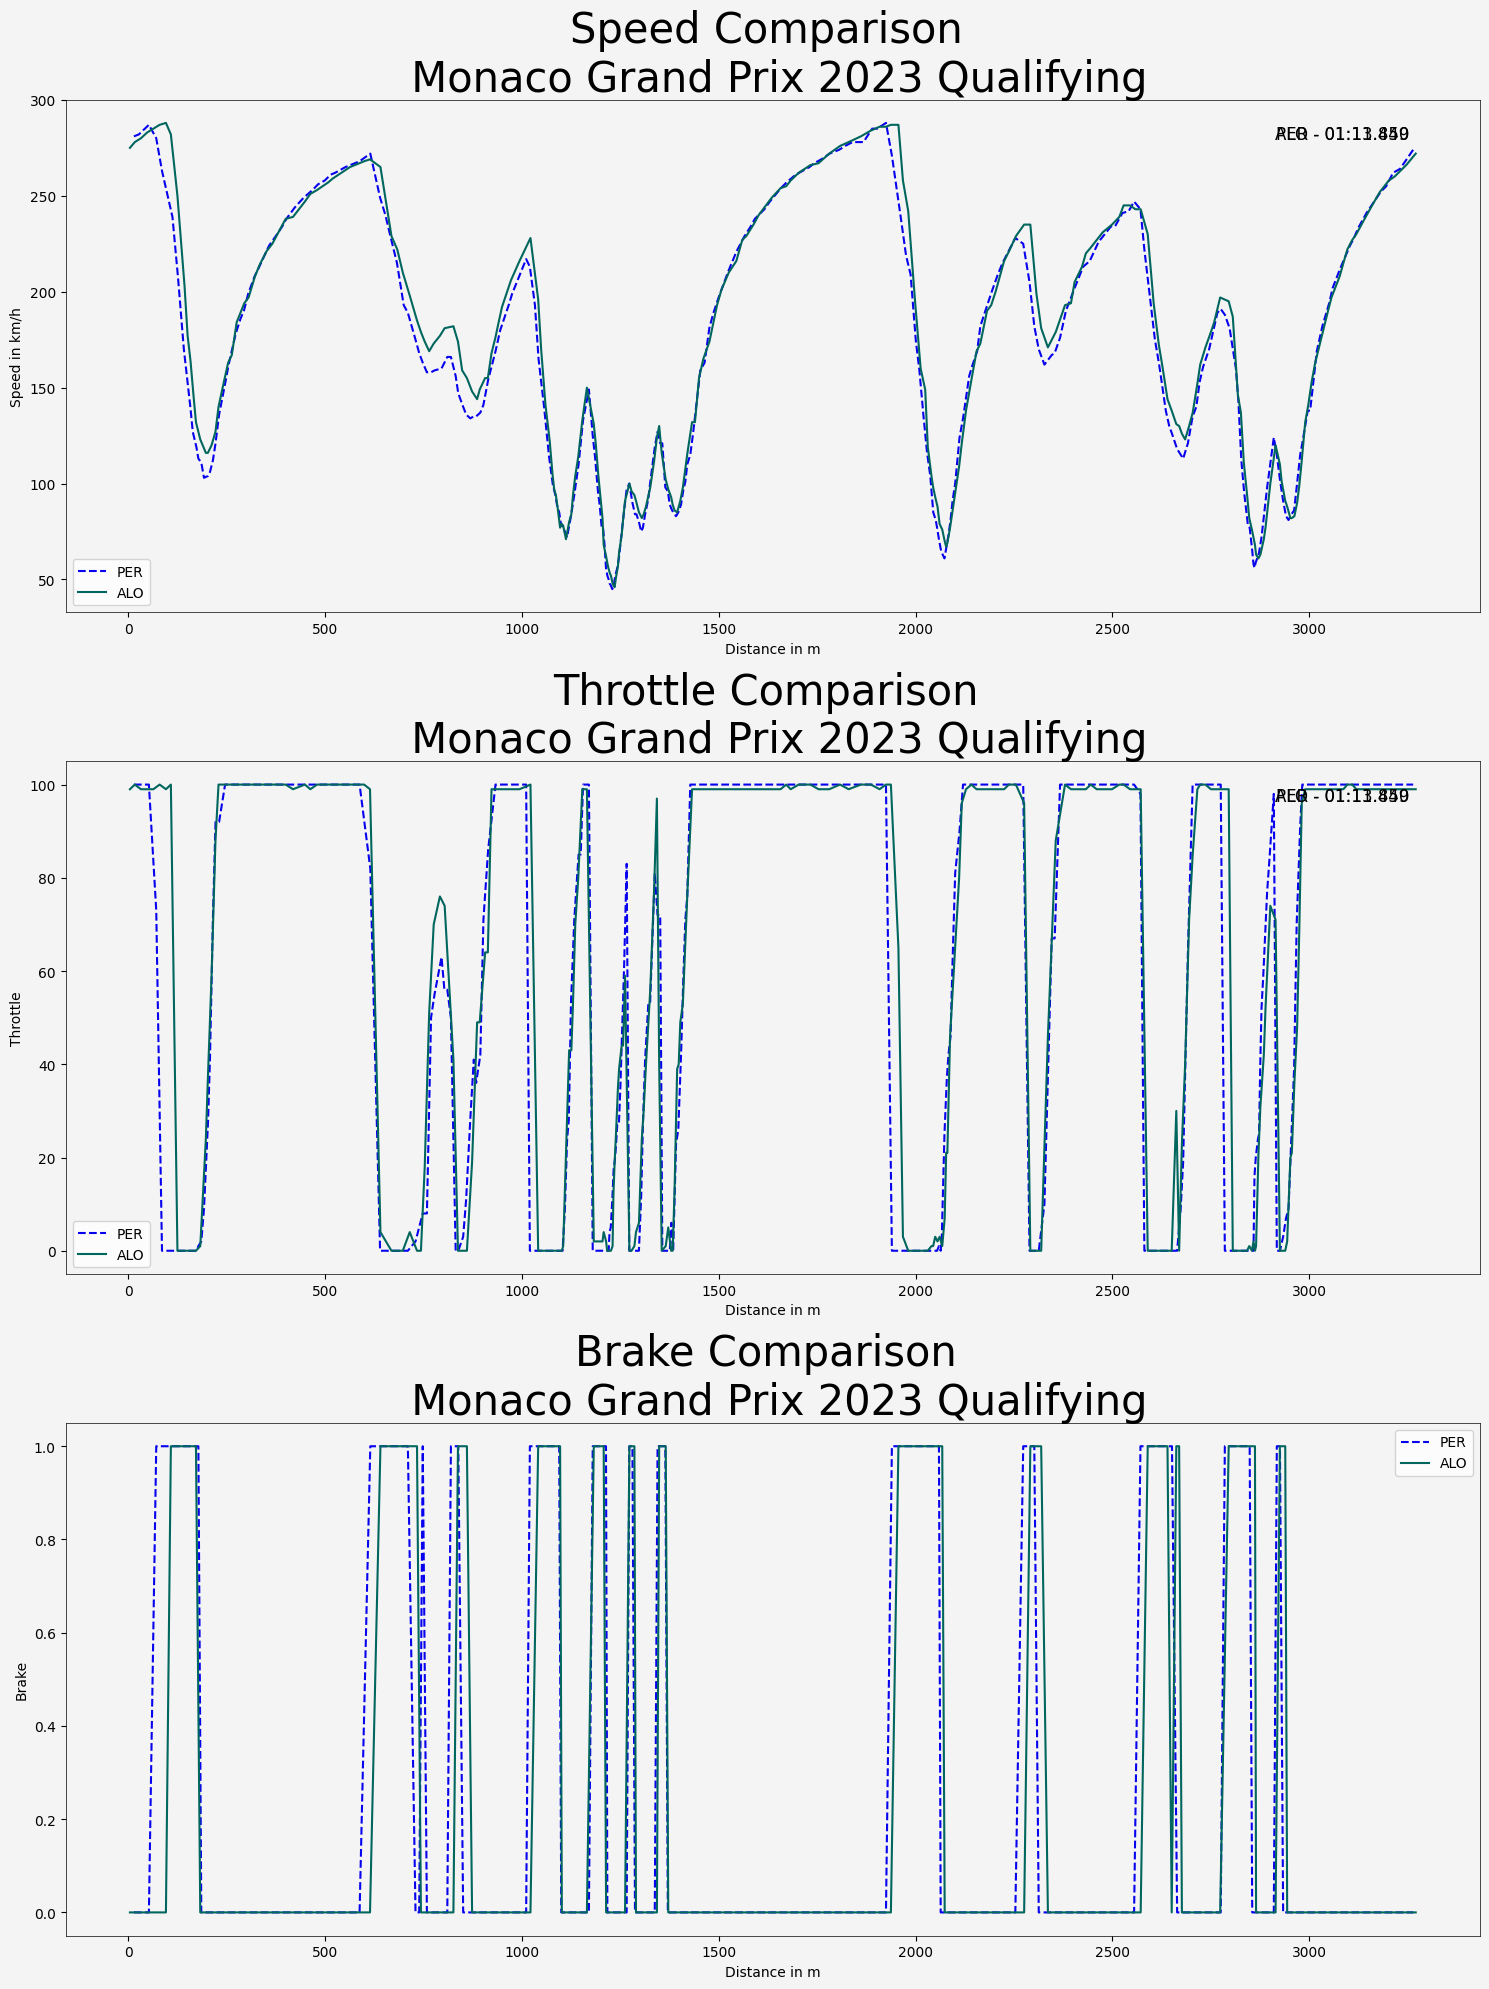

In [43]:
overlap_telemetry_quali(2023, 'Monaco', ['PER', 'ALO'])


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/6/results.json failed; using cached response
Traceback (most recent call last):
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 468, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 463, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 1375, in getresponse
    response.begin()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py",

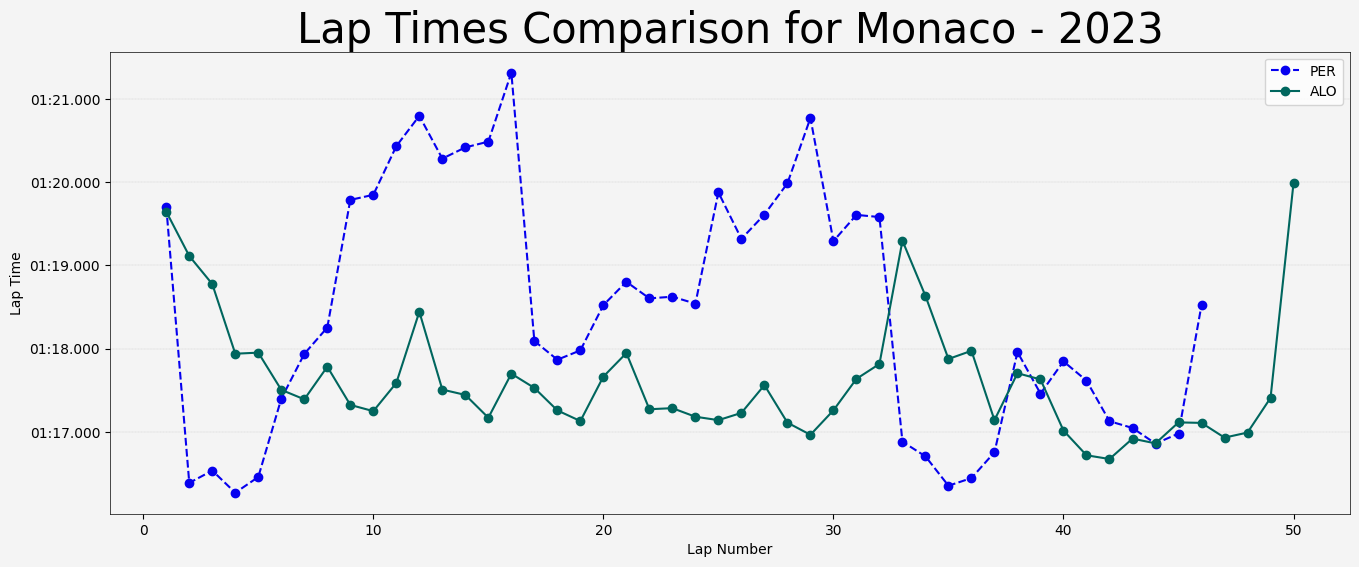

In [104]:
drivers_laptimes_comp(2023, 'Monaco', ['PER', 'ALO'])

### General Plots

In [131]:
def data_position_changes(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load(telemetry=False, weather=False)
    # event_name = race.event['EventName']

    drivers_style = {}
    all_laps = []
    for drv in race.drivers:
        drv_laps = race.laps.pick_driver(drv)
        final_positions = race.results['Position'].to_dict()
        drv_laps['Position'] = drv_laps['Position'].apply(lambda x: final_positions[drv] if pd.isna(x) else x)
        all_laps.append(drv_laps[['LapNumber', 'Position', 'Driver']])
        abb = drv_laps['Driver'].unique()[0]
        style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=race)
        drivers_style[drv] = style


    final_positions = {race.get_driver(driver)['Abbreviation']: pos for driver, pos in final_positions.items()}
    drivers_style = {race.get_driver(driver)['Abbreviation']: pos for driver, pos in drivers_style.items()}
    all_laps_df = pd.concat(all_laps)
    all_laps_df = all_laps_df.pivot(index='Driver', columns='LapNumber', values='Position')

    for driver, row in all_laps_df.iterrows():
        for lap in row.index:
            if pd.isna(row[lap]):
                all_laps_df.at[driver, lap] = final_positions[driver]

    all_laps_df.to_csv(rf'.\data\bueno\{year}\pos_changes_race\df_position_{year}_{event}.csv')
    with open(rf'.\data\bueno\{year}\pos_changes_race\driver_style_{year}_{event}.json', 'w') as f:
        json.dump(drivers_style, f)

In [132]:
data_position_changes(2023, 'Monaco')

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [ ]:
def plot_position_changes(year, event):
    df_position = pd.read_csv(rf'.\data\bueno\{year}\pos_changes_race\df_position_{year}_{event}.csv', index_col=0)
    with open(rf'.\data\bueno\{year}\pos_changes_race\driver_style_{year}_{event}.json', 'r') as f:
        driver_style = json.load(f)

    total_drivers = len(df_position)
    total_laps = len(df_position.columns)

    fig, ax = plt.subplots(figsize=(18.0, 6.9))
    fig.patch.set_facecolor('#f3f3f3')
    ax.set_facecolor('#f3f3f3')
    
    for driver in df_position.index:
        ax.plot(df_position.columns, df_position.loc[driver], label=driver, linewidth=3, **driver_style[driver])
            
    # Set plot limits and labels
    ax.set_ylim([20.5, 0.5])
    ax.set_yticks(range(1, total_drivers+1))
    ax.set_xlim([0, total_laps + 1])
    ax.set_xlabel('Lap', color='black')
    ax.set_ylabel('Position', color='black')
    ax.set_xticks([1] + list(range(5, total_laps + 1, 5)))
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    # Order the elements in the layer using the last column of the DataFrame as indicator of the order
    order = df_position.iloc[:, -1].sort_values().index
    handles, labels = ax.get_legend_handles_labels()
    ordered_handles = [handles[labels.index(driver)] for driver in order]
    ordered_labels = [labels[labels.index(driver)] for driver in order]
    ax.legend(ordered_handles, ordered_labels, bbox_to_anchor=(1.0, 1.02))
    plt.tight_layout()
    ax.set_title(f'{year} {event} - Position Changes During the Race', fontsize=30, color='black')
    
    # Hide grid
    ax.grid(False)

    return fig
        

In [ ]:
def data_qualifying_times(year, event):
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    drivers = pd.unique(session.laps['Driver'])

    list_fastest_laps = list()
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps) \
        .sort_values(by='LapTime') \
        .reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    delta_times = fastest_laps[['LapTime', 'Driver', 'Team']].copy()
    delta_times['LapTimeDelta'] = delta_times['LapTime'] - pole_lap['LapTime']
    delta_times['LapTimeDelta'] = delta_times['LapTimeDelta'].dt.total_seconds()

    driver_colors = {}
    for _, lap in delta_times.iterlaps():
        color = fastf1.plotting.get_team_color(lap['Team'], session=session)
        driver_colors[lap['Driver']] = color

    pole_lap_info = {
        'Driver': pole_lap['Driver'],
        'LapTime': pole_lap['LapTime'].total_seconds()
    }

    complementary_info = {
        'driver_colors': driver_colors,
        'pole_lap': pole_lap_info
    }

    delta_times.to_csv(rf'.\data\bueno\{year}\qualifying_times\{event}_qualifying_times.csv')
    with open(rf'.\data\bueno\{year}\qualifying_times\complementary_info.json', 'w') as f:
        json.dump(complementary_info, f)



In [159]:
def plot_qualifying_times(year, event):
    delta_times = pd.read_csv(rf'.\data\bueno\{year}\qualifying_times\{event}_qualifying_times.csv')

    with open(rf'.\data\bueno\{year}\qualifying_times\complementary_info.json', 'r') as f:
        complementary_info = json.load(f)

    pole_lap = complementary_info['pole_lap']
    team_colors = complementary_info['driver_colors']
    
    fig, ax = plt.subplots(figsize=(16, 6.9))

    ax.barh(delta_times.index, delta_times['LapTimeDelta'],
            color=[team_colors[driver] for driver in delta_times['Driver']], edgecolor='black', linewidth=0.5)
    ax.set_yticks(delta_times.index)
    ax.set_yticklabels(delta_times['Driver'], color='black')
    # ax.tick_params(axis='x', colors='black')
    # show fastest at the top
    ax.invert_yaxis()

    # draw vertical lines behind the bars
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

    lap_time_string = strftimedelta(pd.to_timedelta(pole_lap['LapTime'], unit='s'), '%m:%s.%ms')

    plt.suptitle(f"{event} {year} Qualifying\n"
                 f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})",
                 fontsize=22, color='black')
    
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.yaxis.grid(False)
    
    
    ax.ticklabel_format(useOffset=False, style='plain', axis='x')
    
    # Format yticks as MM:SS.ms
    def format_func(value, tick_number):
        mins, secs = divmod(value, 60)
        return f'{secs:05.3f}'

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax.set_xlabel('Time difference (s)', color='black')
    ax.patch.set_alpha(0.0)
    plt.gca().patch.set_alpha(0)
    plt.tight_layout()
    # plt.savefig(f'.\APP\images\{year}_{event}_qualifying_times.png', transparent=True)
    # plt.show()
    return fig


In [107]:
def data_relative_distances(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()

    # Preparar datos
    laps = race.laps
    drivers = race.drivers
    event_name = race.event['EventName']
    # Crear un diccionario para almacenar el tiempo de inicio del primer piloto de cada vuelta
    first_driver_start_times = {}

    # Iterar sobre cada vuelta
    for lap in laps['LapNumber'].unique():
        # Filtrar las vueltas del piloto y seleccionar la primera posición
        first_driver_lap = laps[(laps['LapNumber'] == lap) & (laps['Position'] == 1)]

        if not first_driver_lap.empty:
            # Obtener el tiempo de inicio del primer piloto
            start_time = pd.Timedelta(first_driver_lap['Time'].values[0]).total_seconds()
            first_driver = first_driver_lap['DriverNumber'].values[0]
            
            first_driver_start_times[lap] = [start_time, first_driver]

    # # Crear un DataFrame para almacenar las distancias de cada piloto al primero en cada vuelta
    distances_to_first = pd.DataFrame(index=laps['LapNumber'].unique(), columns=drivers)
    
    # Iterar sobre cada vuelta y cada piloto
    for lap in first_driver_start_times.keys():
        for driver in drivers:
            # Filtrar las vueltas del piloto y seleccionar la vuelta correspondiente
            driver_lap = laps[(laps['LapNumber'] == lap) & (laps['DriverNumber'] == driver)]
            if not driver_lap.empty:
                # Obtener el tiempo de inicio del piloto
                driver_start_time = pd.Timedelta(driver_lap['Time'].values[0]).total_seconds()
                # Calcular la distancia al primer piloto en segundos
                distance_to_first = driver_start_time - first_driver_start_times[lap][0]
                distances_to_first.loc[lap, driver] = distance_to_first

    # Convertir el DataFrame a tipo float
    distances_to_first.astype(float)
    # Change the column names from driverNumber to Driver (3 letter abbreviation)
    driver_abbr = laps[['DriverNumber', 'Driver']].drop_duplicates().set_index('DriverNumber')['Driver'].to_dict()
    distances_to_first.rename(columns=driver_abbr, inplace=True)

    drivers_style = {}
    for drv in distances_to_first.columns:
        try:
            style = fastf1.plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=race)
        except:
            style = {'color': 'black', 'linestyle': 'solid'}
        drivers_style[drv] = style

    distances_to_first.to_csv(rf'.\data\bueno\{year}\relative_distances\{event}_relative_distances.csv', index=True)

    with open(rf'.\data\bueno\{year}\relative_distances\{event}_styles.json', 'w') as f:
        json.dump(drivers_style, f)


In [105]:
plot_relative_distances(2023, 'Australian Grand Prix')

In [71]:
def plot_relative_distances(year, event):
    distances_to_first = pd.read_csv(rf'.\data\bueno\{year}\relative_distances\{event}_relative_distances.csv', index_col=0)

    with open(rf'.\data\bueno\{year}\relative_distances\{event}_styles.json', 'r') as f:
        drivers_style = json.load(f)

    fig = px.line(distances_to_first, x=distances_to_first.index, y=distances_to_first.columns,
              labels={'value': 'Distance to First (s)', 'index': 'Lap'}, 
              title=f'{year} {event} - Distance to First During the Race', line_shape='linear')

    fig.update_layout(
        xaxis_title='Lap',
        yaxis_title='Distance to First (s)',
        legend_title='Driver',
        yaxis=dict(autorange='reversed'),
        template='plotly_white'
    )
    drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}
    for driver, style in drivers_style.items():
        fig.update_traces(selector=dict(name=driver), line=dict(color=style['color'], dash=style['linestyle']))
    return fig


In [70]:
plot_relative_distances(2023, 'Monaco')

In [ ]:
## SEPARAR ESTAA


def relative_distances_plot_interactive(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()

    # Preparar datos
    laps = race.laps
    drivers = race.drivers
    event_name = race.event['EventName']

    # Crear un diccionario para almacenar el tiempo de inicio del primer piloto de cada vuelta
    first_driver_start_times = {}

    # Iterar sobre cada vuelta
    for lap in laps['LapNumber'].unique():
        # Filtrar las vueltas del piloto y seleccionar la primera posición
        first_driver_lap = laps[(laps['LapNumber'] == lap) & (laps['Position'] == 1)]
        # print(first_driver_lap)
        if not first_driver_lap.empty:
            # Obtener el tiempo de inicio del primer piloto
            start_time = pd.Timedelta(first_driver_lap['Time'].values[0]).total_seconds()
            first_driver = first_driver_lap['DriverNumber'].values[0]

            
            first_driver_start_times[lap] = [start_time, first_driver]

    # # Crear un DataFrame para almacenar las distancias de cada piloto al primero en cada vuelta
    distances_to_first = pd.DataFrame(index=laps['LapNumber'].unique(), columns=drivers)

    # Iterar sobre cada vuelta y cada piloto
    for lap in laps['LapNumber'].unique():
        for driver in drivers:
            # Filtrar las vueltas del piloto y seleccionar la vuelta correspondiente
            driver_lap = laps[(laps['LapNumber'] == lap) & (laps['DriverNumber'] == driver)]
            if not driver_lap.empty:
                # Obtener el tiempo de inicio del piloto
                driver_start_time = pd.Timedelta(driver_lap['Time'].values[0]).total_seconds()
                # Calcular la distancia al primer piloto en segundos
                distance_to_first = driver_start_time - first_driver_start_times[lap][0]
                distances_to_first.loc[lap, driver] = distance_to_first

    # Convertir el DataFrame a tipo float
    distances_to_first.astype(float)
    # Change the column names from driverNumber to Driver (3 letter abbreviation)
    driver_abbr = laps[['DriverNumber', 'Driver']].drop_duplicates().set_index('DriverNumber')['Driver'].to_dict()
    distances_to_first.rename(columns=driver_abbr, inplace=True)

    drivers_style = {}
    for drv in distances_to_first.columns:
        style = fastf1.plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=race)
        drivers_style[drv] = style

    fig = px.line(distances_to_first, x=distances_to_first.index, y=distances_to_first.columns,
              labels={'value': 'Distance to First (s)', 'index': 'Lap'}, 
              title=f'{year} {event_name} - Distance to First During the Race', line_shape='linear')

    fig.update_layout(
        xaxis_title='Lap',
        yaxis_title='Distance to First (s)',
        legend_title='Driver',
        yaxis=dict(autorange='reversed'),
        template='plotly_white'
    )
    drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}
    for driver, style in drivers_style.items():
        fig.update_traces(selector=dict(name=driver), line=dict(color=style['color'], dash=style['linestyle']))
    fig.show()


In [ ]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)


# Plotting position changes for each driver along a race
def position_changes_plot(year, event): #done
    # plt.style.use('fivethirtyeight')
    
    # Load race session
    session = fastf1.get_session(year, event, 'R')
    session.load(telemetry=False, weather=False)
    event_name = session.event['EventName']

    fig, ax = plt.subplots(figsize=(18.0, 6.9))
    fig.patch.set_facecolor('#f4f4f4')
    ax.set_facecolor('#f4f4f4')
    
    # Plot position changes for each driver
    for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        final_positions = session.results['Position'].to_dict()
        drv_laps['Position'] = drv_laps['Position'].apply(lambda x: final_positions[drv] if pd.isna(x) else x)
        abb = drv_laps['Driver'].unique()
        if len(abb) < 1:
            continue
        else:
            abb = abb[0]
            style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session)
            ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, linewidth=2, **style)
            
    # Set plot limits and labels
    ax.set_ylim([20.5, 0.5])
    ax.set_yticks(range(1, len(session.drivers)+1))
    ax.set_xlim([0, session.total_laps + 1])
    ax.set_xlabel('Lap', color='black')
    ax.set_ylabel('Position', color='black')
    ax.set_xticks([1] + list(range(5, session.total_laps + 1, 5)))
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    plt.tight_layout()
    ax.set_title(f'{year} {event_name} - Position Changes During the Race', fontsize=30, color='black')
    
    # Hide grid
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    plt.show()



def relative_distances_plot(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()

    # Preparar datos
    laps = race.laps
    drivers = race.drivers
    event_name = race.event['EventName']

    # Crear un diccionario para almacenar el tiempo de inicio del primer piloto de cada vuelta
    first_driver_start_times = {}

    # Iterar sobre cada vuelta
    for lap in laps['LapNumber'].unique():
        # Filtrar las vueltas del piloto y seleccionar la primera posición
        first_driver_lap = laps[(laps['LapNumber'] == lap) & (laps['Position'] == 1)]
        # print(first_driver_lap)
        if not first_driver_lap.empty:
            # Obtener el tiempo de inicio del primer piloto
            start_time = pd.Timedelta(first_driver_lap['Time'].values[0]).total_seconds()
            first_driver = first_driver_lap['DriverNumber'].values[0]

            
            first_driver_start_times[lap] = [start_time, first_driver]

    # first_driver_start_times
    # # Crear un DataFrame para almacenar las distancias de cada piloto al primero en cada vuelta
    distances_to_first = pd.DataFrame(index=laps['LapNumber'].unique(), columns=drivers)
    distances_to_first
    # Iterar sobre cada vuelta y cada piloto
    for lap in laps['LapNumber'].unique():
        for driver in drivers:
            # Filtrar las vueltas del piloto y seleccionar la vuelta correspondiente
            driver_lap = laps[(laps['LapNumber'] == lap) & (laps['DriverNumber'] == driver)]
            if not driver_lap.empty:
                # Obtener el tiempo de inicio del piloto
                driver_start_time = pd.Timedelta(driver_lap['Time'].values[0]).total_seconds()
                # Calcular la distancia al primer piloto en segundos
                distance_to_first = driver_start_time - first_driver_start_times[lap][0]
                distances_to_first.loc[lap, driver] = distance_to_first

    # Convertir el DataFrame a tipo float
    distances_to_first.astype(float)
    # Change the column names from driverNumber to Driver (3 letter abbreviation)
    driver_abbr = laps[['DriverNumber', 'Driver']].drop_duplicates().set_index('DriverNumber')['Driver'].to_dict()
    distances_to_first.rename(columns=driver_abbr, inplace=True)

####################

    # # Plot distance to first for each driver
    fig, ax = plt.subplots(figsize=(15, 8))
    fig.patch.set_facecolor('#f4f4f4')
    ax.set_facecolor('#f4f4f4')
    drivers_style = {}
    for drv in distances_to_first.columns:
        style = fastf1.plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=race)
        drivers_style[drv] = style
        ax.plot(distances_to_first.index, distances_to_first[drv], label=drv, linewidth=2, **style)

    # Set plot limits and labels
    ax.set_ylim([distances_to_first.min().min() - 10, distances_to_first.max().max() + 10])
    ax.set_xlim([1, distances_to_first.index.max()])
    ax.set_xlabel('Lap', color='black')
    ax.set_ylabel('Distance to First (s)', color='black')
    ax.set_xticks([1] + list(range(5, int(distances_to_first.index.max()) + 1, 5)))
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    plt.tight_layout()
    ax.set_title(f'{year} {event_name} - Distances (s) During the Race', fontsize=30, color='black')

    # Hide grid
    ax.grid(False)
    ax.set_ylim(-5, 200)
    ax.invert_yaxis()
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    plt.show()

def relative_distances_plot_interactive(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()

    # Preparar datos
    laps = race.laps
    drivers = race.drivers
    event_name = race.event['EventName']

    # Crear un diccionario para almacenar el tiempo de inicio del primer piloto de cada vuelta
    first_driver_start_times = {}

    # Iterar sobre cada vuelta
    for lap in laps['LapNumber'].unique():
        # Filtrar las vueltas del piloto y seleccionar la primera posición
        first_driver_lap = laps[(laps['LapNumber'] == lap) & (laps['Position'] == 1)]
        # print(first_driver_lap)
        if not first_driver_lap.empty:
            # Obtener el tiempo de inicio del primer piloto
            start_time = pd.Timedelta(first_driver_lap['Time'].values[0]).total_seconds()
            first_driver = first_driver_lap['DriverNumber'].values[0]

            
            first_driver_start_times[lap] = [start_time, first_driver]

    # # Crear un DataFrame para almacenar las distancias de cada piloto al primero en cada vuelta
    distances_to_first = pd.DataFrame(index=laps['LapNumber'].unique(), columns=drivers)

    # Iterar sobre cada vuelta y cada piloto
    for lap in laps['LapNumber'].unique():
        for driver in drivers:
            # Filtrar las vueltas del piloto y seleccionar la vuelta correspondiente
            driver_lap = laps[(laps['LapNumber'] == lap) & (laps['DriverNumber'] == driver)]
            if not driver_lap.empty:
                # Obtener el tiempo de inicio del piloto
                driver_start_time = pd.Timedelta(driver_lap['Time'].values[0]).total_seconds()
                # Calcular la distancia al primer piloto en segundos
                distance_to_first = driver_start_time - first_driver_start_times[lap][0]
                distances_to_first.loc[lap, driver] = distance_to_first

    # Convertir el DataFrame a tipo float
    distances_to_first.astype(float)
    # Change the column names from driverNumber to Driver (3 letter abbreviation)
    driver_abbr = laps[['DriverNumber', 'Driver']].drop_duplicates().set_index('DriverNumber')['Driver'].to_dict()
    distances_to_first.rename(columns=driver_abbr, inplace=True)

    drivers_style = {}
    for drv in distances_to_first.columns:
        style = fastf1.plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=race)
        drivers_style[drv] = style

    fig = px.line(distances_to_first, x=distances_to_first.index, y=distances_to_first.columns,
              labels={'value': 'Distance to First (s)', 'index': 'Lap'}, 
              title=f'{year} {event_name} - Distance to First During the Race', line_shape='linear')

    fig.update_layout(
        xaxis_title='Lap',
        yaxis_title='Distance to First (s)',
        legend_title='Driver',
        yaxis=dict(autorange='reversed'),
        template='plotly_white'
    )
    drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}
    for driver, style in drivers_style.items():
        fig.update_traces(selector=dict(name=driver), line=dict(color=style['color'], dash=style['linestyle']))
    fig.show()


#Plotting qualifying times of a given Grand Prix

def qulifying_times_plot(year, event):  #done
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    drivers = pd.unique(session.laps['Driver'])

    list_fastest_laps = list()
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps) \
        .sort_values(by='LapTime') \
        .reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

    fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()

    team_colors = list()
    for _, lap in fastest_laps.iterlaps():
        color = fastf1.plotting.get_team_color(lap['Team'], session=session)
        team_colors.append(color)

    fig, ax = plt.subplots(figsize=(16, 6.9))

    fig.patch.set_facecolor('#f4f4f4')
    ax.set_facecolor('#f4f4f4')

    ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
            color=team_colors, edgecolor='black', linewidth=0.5)
    ax.set_yticks(fastest_laps.index)
    ax.set_yticklabels(fastest_laps['Driver'], color='black')
    # ax.tick_params(axis='x', colors='black')
    # show fastest at the top
    ax.invert_yaxis()

    # draw vertical lines behind the bars
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

    lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

    plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
                 f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})",
                 fontsize=22, color='black')
    
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.yaxis.grid(False)
    
    
    ax.ticklabel_format(useOffset=False, style='plain', axis='x')
    
    # Format yticks as MM:SS.ms
    def format_func(value, tick_number):
        mins, secs = divmod(value, 60)
        return f'{secs:05.3f}'

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax.set_xlabel('Time difference (s)', color='black')
    
    plt.show()

#Plotting the pitstop strategies along a race
def pitstop_estrategy(year, event):
    # plt.style.use('fivethirtyeight')

    race = fastf1.get_session(year, event, 'R')
    race.load()
    event_name = race.event['EventName']

    laps = race.laps
    drivers = race.drivers
    drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]

    stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
    stints = stints.groupby(["Driver", "Stint", "Compound"])
    stints = stints.count().reset_index()

    stints = stints.rename(columns={"LapNumber": "StintLength"})

    print(stints)
    fig, ax = plt.subplots(figsize=(8, 10))

    fig.patch.set_facecolor('#f4f4f4')
    ax.set_facecolor('#f4f4f4')

    for driver in drivers:
        driver_stints = stints.loc[stints["Driver"] == driver]

        previous_stint_end = 0
        for _, row in driver_stints.iterrows():
            compound_color = fastf1.plotting.get_compound_color(row["Compound"], session=race)
            plt.barh(
                y=driver,
                width=row["StintLength"],
                left=previous_stint_end,
                color=compound_color,
                edgecolor="black",
                fill=True
            )

            previous_stint_end += row["StintLength"]

    plt.title(f"{year} {event_name} Strategies", color='black')

    # Set frame thickness and color
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('black')

    plt.xlabel("Lap Number", color='black')
    plt.ylabel("Driver", color='black')
    plt.grid(False)
    ax.invert_yaxis()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    plt.tight_layout()
    plt.show()

    return stints, drivers



In [22]:
data_pitstop_estrategy(2023, 'Monaco')

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [ ]:

def data_pitstop_estrategy(year, event):
    race = fastf1.get_session(year, event, 'R')
    race.load()
    event_name = race.event['EventName']

    laps = race.laps
    drivers = race.drivers
    drivers = [race.get_driver(driver)["Abbreviation"] for driver in drivers]
    drivers_df = pd.DataFrame(drivers, columns=['Driver'])

    stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
    stints = stints.groupby(["Driver", "Stint", "Compound"])
    stints = stints.count().reset_index()

    stints = stints.rename(columns={"LapNumber": "StintLength"})

    compound_colors = {}
    for compound in stints["Compound"].unique():
        compound_color = fastf1.plotting.get_compound_color(compound, session=race)
        compound_colors[compound] = compound_color

    stints.to_csv(rf'.\data\bueno\{year}\pitstop_strategies\{event_name}_pitstop_strategies.csv')
    drivers_df.to_csv(rf'.\data\bueno\{year}\pitstop_strategies\{event_name}_positions.csv', index=False)
    file_path = rf'.\data\bueno\{year}\pitstop_strategies\compound_colors.json'
    if not os.path.exists(file_path):
        with open(file_path, 'w') as f:
            json.dump(compound_colors, f)

In [35]:
def plot_pitstop_estrategy(year, event):
    stints = pd.read_csv(rf'.\data\bueno\{year}\pitstop_strategies\{event}_pitstop_strategies.csv')
    drivers = pd.read_csv(rf'.\data\bueno\{year}\pitstop_strategies\{event}_positions.csv')['Driver']
    with open(rf'.\data\bueno\{year}\pitstop_strategies\compound_colors.json', 'r') as f:
        compound_colors = json.load(f)

    fig, ax = plt.subplots(figsize=(8, 10))

    fig.patch.set_facecolor('#f4f4f4')
    ax.set_facecolor('#f4f4f4')

    for driver in drivers:
        driver_stints = stints.loc[stints["Driver"] == driver]

        previous_stint_end = 0
        for _, row in driver_stints.iterrows():
            plt.barh(
                y=driver,
                width=row["StintLength"],
                left=previous_stint_end,
                color=compound_colors[row["Compound"]],
                edgecolor="black",
                fill=True
            )

            previous_stint_end += row["StintLength"]

    plt.title(f"{year} {event} Strategies", color='black')
    # Create custom legend
    legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=compound) for compound, color in compound_colors.items()]
    ax.legend(handles=legend_elements, title="Compound", bbox_to_anchor=(1.05, 1), loc='upper left')
    # Change the background color of the legend
    legend = ax.get_legend()
    legend.get_frame().set_facecolor('#a7a7a7')

    # Change the color of the legend text
    for text in legend.get_texts():
        text.set_color('black')

    # Set frame thickness and color
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('black')

    plt.xlabel("Lap Number", color='black')
    plt.ylabel("Driver", color='black')
    plt.grid(False)
    ax.invert_yaxis()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # plt.tight_layout()
    plt.show()

    return fig



events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', 

   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            1
1     ALO    1.0     SOFT            1
2     ALO    2.0     SOFT            1
3     ALO    3.0     SOFT           23
4     ALO    4.0   MEDIUM           22
..    ...    ...      ...          ...
82    VER    5.0     SOFT           15
83    ZHO    1.0     SOFT            1
84    ZHO    2.0     SOFT            1
85    ZHO    3.0     SOFT           13
86    ZHO    4.0   MEDIUM            7

[87 rows x 4 columns]


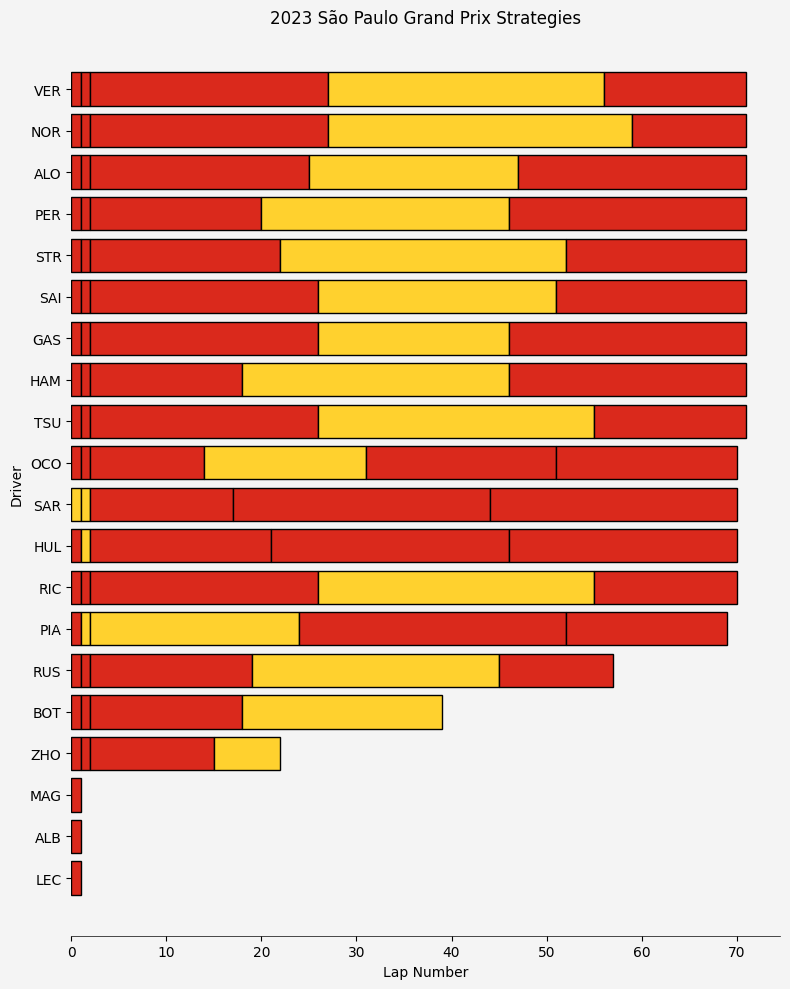

In [10]:
stints, drivers = pitstop_estrategy(2023, 'Brasil')

In [14]:
stints

Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            1
1     ALO    1.0     SOFT            1
2     ALO    2.0     SOFT            1
3     ALO    3.0     SOFT           23
4     ALO    4.0   MEDIUM           22
..    ...    ...      ...          ...
82    VER    5.0     SOFT           15
83    ZHO    1.0     SOFT            1
84    ZHO    2.0     SOFT            1
85    ZHO    3.0     SOFT           13
86    ZHO    4.0   MEDIUM            7

[87 rows x 4 columns]

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', '20', '23', '16']
req            INFO 	Using cached data for driver_info


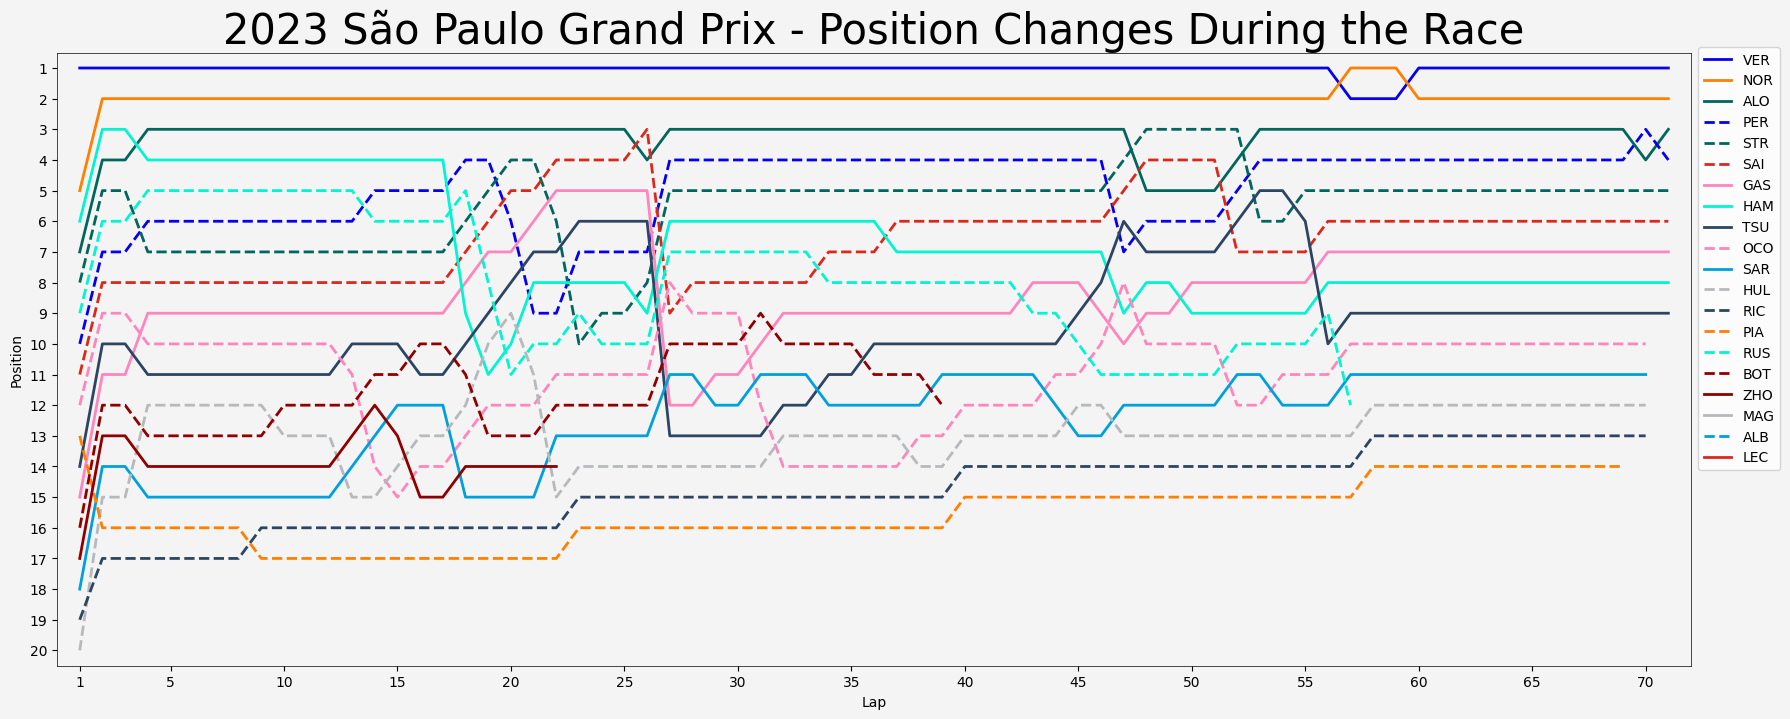

In [26]:
position_changes_plot(2023, 'Brasil')

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/20/results.json failed; using cached response
Traceback (most recent call last):
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 468, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 463, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 1375, in getresponse
    response.begin()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  F

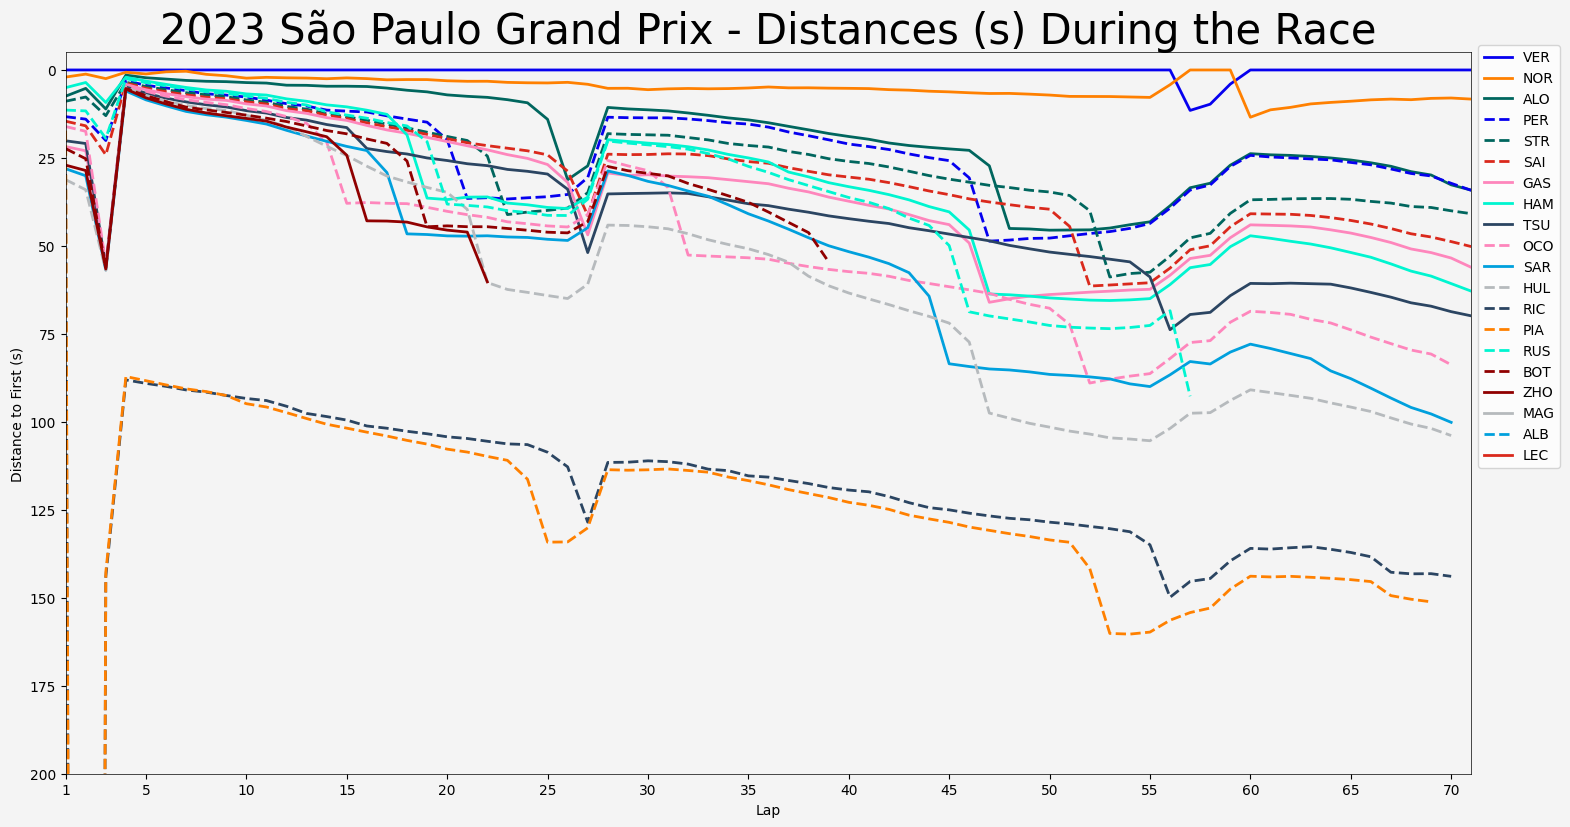

In [78]:
relative_distances_plot(2023, 'Brasil')

In [82]:
relative_distances_plot_interactive(2023, 'Brasil')

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/20/results.json failed; using cached response
Traceback (most recent call last):
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 468, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "d:\Cositas\entorno_f1\lib\site-packages\urllib3\connectionpool.py", line 463, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 1375, in getresponse
    response.begin()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  F

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']


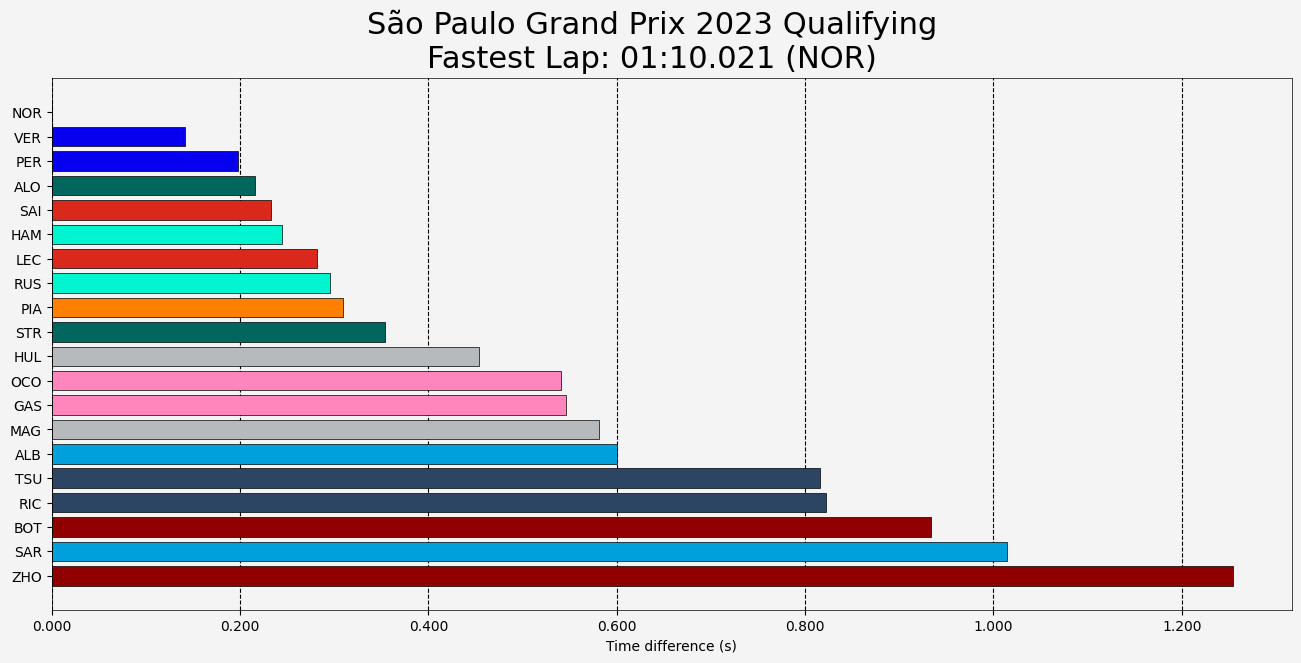

In [29]:
qulifying_times_plot(2023, 'Brasil')

req         WARNING 	DEFAULT CACHE ENABLED! (6.42 GB) C:\Users\Usuario\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', 

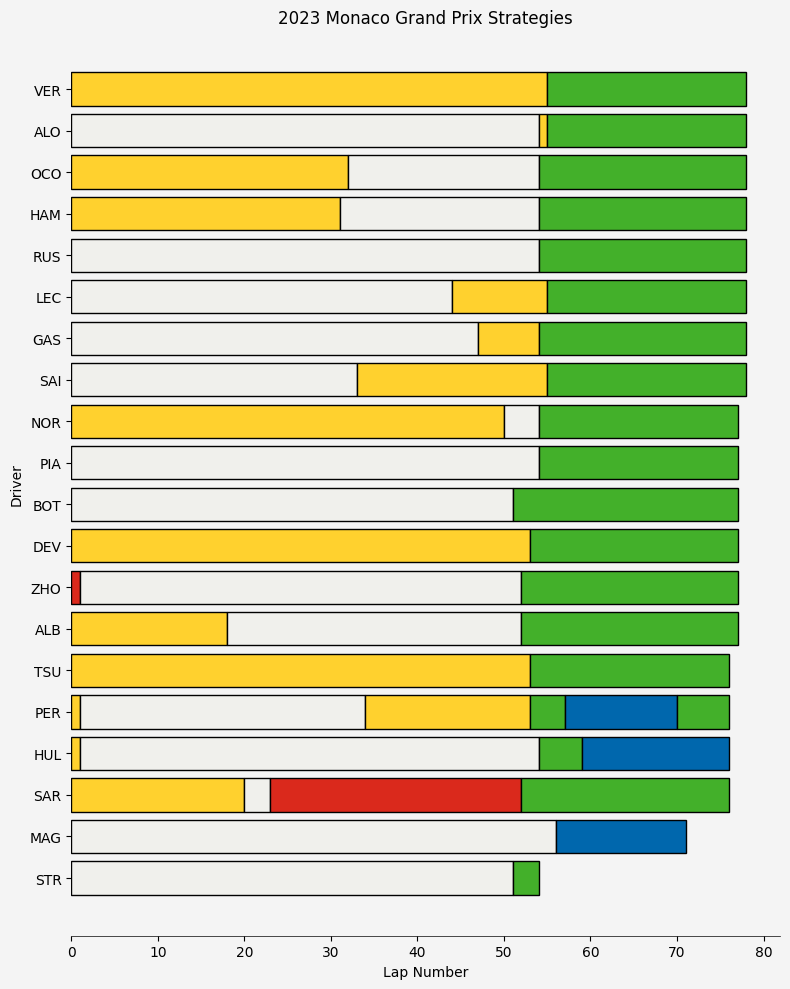

In [ ]:
pitstop_estrategy(2023, 'Monaco')

## Circuito

In [15]:

# List all available style sheets
style_sheets = plt.style.available
print(style_sheets)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

#Plot the track map of a given Grand Prix
def plot_circuit(year, event):
    plt.style.use('seaborn-v0_8')
    race = fastf1.get_session(year, event, 'R')
    race.load()
    event_name = race.event['EventName']
    lap = race.laps.pick_fastest()
    pos = lap.get_pos_data()

    circuit_info = race.get_circuit_info()

    # Get an array of shape [n, 2] where n is the number of points and the second
    # axis is x and y.
    track = pos.loc[:, ('X', 'Y')].to_numpy()

    # Convert the rotation angle from degrees to radian.
    track_angle = circuit_info.rotation / 180 * np.pi

    # Rotate and plot the track map.
    rotated_track = rotate(track, angle=track_angle)
    plt.figure(figsize=(12, 8), facecolor='#f4f4f4')
    plt.plot(rotated_track[:, 0], rotated_track[:, 1], color='red', linewidth=5)
    plt.gca().set_facecolor('#f4f4f4')

    offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

    # Iterate over all corners.
    for _, corner in circuit_info.corners.iterrows():
        # Create a string from corner number and letter
        txt = f"{corner['Number']}{corner['Letter']}"

        # Convert the angle from degrees to radian.
        offset_angle = corner['Angle'] / 180 * np.pi

        # Rotate the offset vector so that it points sideways from the track.
        offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

        # Add the offset to the position of the corner
        text_x = corner['X'] + offset_x
        text_y = corner['Y'] + offset_y

        # Rotate the text position equivalently to the rest of the track map
        text_x, text_y = rotate([text_x, text_y], angle=track_angle)

        # Rotate the center of the corner equivalently to the rest of the track map
        track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

        # Draw a circle next to the track.
        plt.scatter(text_x, text_y, color='black', s=200)

        # Draw a line from the track to this circle.
        plt.plot([track_x, text_x], [track_y, text_y], color='black')

        # Finally, print the corner number inside the circle.
        plt.text(text_x, text_y, txt,
                va='center_baseline', ha='center', size='small', color='white')
        

    plt.title(f"{event_name} circuit", color='black', size=30 )
    plt.xticks([])
    plt.yticks([])
    plt.axis('equal')
    plt.savefig(f'.\APP\images\circuits\{event_name}_track.png', transparent=True)
    # plt.show()


#Plot the speed and the turns of a circuit
def plot_circuit_speed_turns(year, event, colormap=plt.cm.plasma):
    plt.style.use('seaborn-v0_8')
    # Load the race session
    race = fastf1.get_session(year, event, 'R')
    race.load()

    event_name = race.event['EventName']

    # Load the qualifying session
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    # Get the fastest lap and its telemetry data
    lap = session.laps.pick_fastest()
    pos = lap.get_pos_data()
    circuit_info = race.get_circuit_info()

    # Get an array of shape [n, 2] where n is the number of points and the second axis is x and y
    track = pos.loc[:, ('X', 'Y')].to_numpy()

    # Convert the rotation angle from degrees to radians
    track_angle = circuit_info.rotation / 180 * np.pi

    # Rotate the track map and telemetry data
    rotated_track = rotate(track, angle=track_angle)
    rotated_x = rotate(lap.telemetry[['X', 'Y']].to_numpy(), angle=track_angle)[:, 0]
    rotated_y = rotate(lap.telemetry[['X', 'Y']].to_numpy(), angle=track_angle)[:, 1]

    # Get telemetry data for speed plotting
    color = lap.telemetry['Speed']

    points = np.array([rotated_x, rotated_y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 8), facecolor='#f4f4f4')
    fig.suptitle(f'{event_name} - Speed (km/h) and Turns', size=30, y=0.97, color='black')

    # Adjust margins and turn off axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    ax.set_facecolor('#f4f4f4')

    # Plot the background track line
    ax.plot(rotated_track[:, 0], rotated_track[:, 1], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Plot the turns
    offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        offset_angle = corner['Angle'] / 180 * np.pi
        offset_x, offset_y = rotate(offset_vector, angle=offset_angle)
        text_x = corner['X'] + offset_x
        text_y = corner['Y'] + offset_y
        text_x, text_y = rotate([text_x, text_y], angle=track_angle)
        track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)
        ax.scatter(text_x, text_y, color='black', s=200)
        ax.plot([track_x, text_x], [track_y, text_y], color='black')
        ax.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')
    
    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

    # # Add a black frame to the legend
    # legend.outline.set_edgecolor('black')
    # legend.outline.set_linewidth(2)

    #save image 
    plt.savefig(f'.\APP\images\circuits\{event_name}_speed_track.png', transparent=True)
    # Show the plot
    # plt.show()


events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Updating cache for session_info...
_api           INFO 	Fetching session info data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	

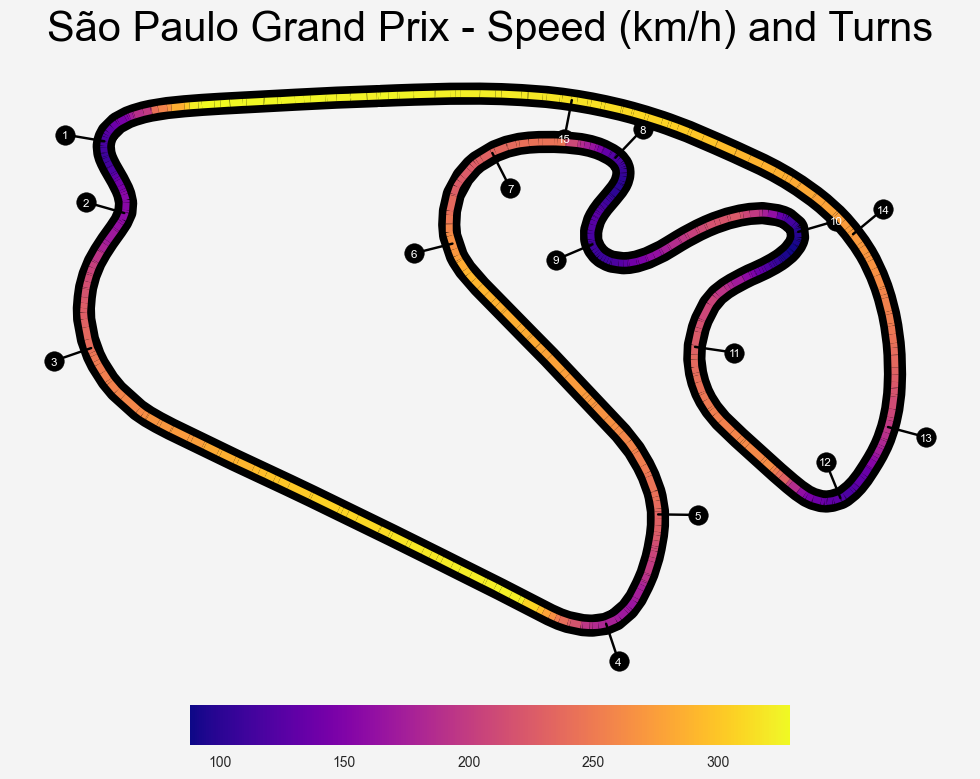

In [19]:
plot_circuit_speed_turns(2023, 'Brasil')


In [21]:
circuits_info = pd.read_csv(r".\data\bueno\2023\circuits_info\circuits_2023_info.csv")


In [ ]:
# year = 2023
# event = 'Brasil'
# race = fastf1.get_session(year, event, 'R')
# race.load()

results = pd.DataFrame(race.results)

In [27]:
results = pd.DataFrame(race.results)

results = results[['Abbreviation', 'Position', 'Time', 'Status', 'Points']]

results = results.rename(columns={'Abbreviation': 'Driver'})

results['Position'] = results['Position'].astype(int)
results['Points'] = results['Points'].astype(int)

results['Time'] = results['Time'].apply(lambda x: x if pd.isnull(x) else str(x).split(' ')[-1])
max_time = results['Time'][0]


for index, row in results.iterrows():
    if pd.isna(row['Time']) or row['Time'] == max_time:
        continue
    else:
        results.at[index, 'Time'] = '+' + str(row['Time'])
results.to_csv(rf'.\data\bueno\{year}\results_info\{event}_results.csv', index=False)

In [17]:
results_23

number  position positionText  points  grid  laps    status  \
0         1         1            1    25.0     1    57  Finished   
1        11         2            2    18.0     2    57  Finished   
2        14         3            3    15.0     5    57  Finished   
3        55         4            4    12.0     4    57  Finished   
4        44         5            5    10.0     7    57  Finished   
..      ...       ...          ...     ...   ...   ...       ...   
435       2        16           16     0.0    20    58  Finished   
436      24        17           17     0.0    19    58  Finished   
437      55        18           18     0.0    16    57   Retired   
438      77        19           19     0.0    18    57    +1 Lap   
439      20        20           20     0.0    17    57    +1 Lap   

            driverId  driverNumber driverCode  ... constructorName  \
0     max_verstappen            33        VER  ...        Red Bull   
1              perez            11        PER  ...        Red Bull   
2             alonso            14        ALO  ...    Aston Martin   
3              sainz            55        SAI  ...         Ferrari   
4           hamilton            44        HAM  ...        Mercedes   
..               ...           ...        ...  ...             ...   
435         sargeant             2        SAR  ...        Williams   
436             zhou            24        ZHO  ...      Alfa Romeo   
437            sainz            55        SAI  ...         Ferrari   
438           bottas            77        BOT  ...      Alfa Romeo   
439  kevin_magnussen            20        MAG  ...    Haas F1 Team   

    constructorNationality totalRaceTimeMillis           totalRaceTime  \
0                 Austrian           5636736.0  0 days 01:33:56.736000   
1                 Austrian           5648723.0  0 days 00:00:11.987000   
2                  British           5675373.0  0 days 00:00:38.637000   
3                  Italian           5684788.0  0 days 00:00:48.052000   
4                   German           5687713.0  0 days 00:00:50.977000   
..                     ...                 ...                     ...   
435                British           5310415.0  0 days 00:01:27.791000   
436                  Swiss           5312046.0  0 days 00:01:29.422000   
437                Italian                 NaN                     NaN   
438                  Swiss                 NaN                     NaN   
439               American                 NaN                     NaN   

    fastestLapRank fastestLapNumber          fastestLapTime  \
0              6.0             44.0  0 days 00:01:36.236000   
1              7.0             37.0  0 days 00:01:36.344000   
2              5.0             36.0  0 days 00:01:36.156000   
3             14.0             37.0  0 days 00:01:37.130000   
4             10.0             36.0  0 days 00:01:36.546000   
..             ...              ...                     ...   
435           12.0             43.0  0 days 00:01:28.580000   
436           13.0             43.0  0 days 00:01:28.746000   
437           17.0             42.0  0 days 00:01:29.452000   
438           18.0             42.0  0 days 00:01:29.863000   
439           19.0             46.0  0 days 00:01:29.934000   

    fastestLapAvgSpeedUnits fastestLapAvgSpeed              raceName  
0                       kph            202.452    Bahrain Grand Prix  
1                       kph            202.225    Bahrain Grand Prix  
2                       kph            202.620    Bahrain Grand Prix  
3                       kph            200.588    Bahrain Grand Prix  
4                       kph            201.802    Bahrain Grand Prix  
..                      ...                ...                   ...  
435                     kph            214.626  Abu Dhabi Grand Prix  
436                     kph            214.224  Abu Dhabi Grand Prix  
437                     kph            212.534  Abu Dhabi Gran

In [ ]:
[['driverCode', 'position', 'totalRaceTime', 'status', 'points']]

In [21]:
results_23.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'driverId', 'driverNumber', 'driverCode', 'driverUrl',
       'givenName', 'familyName', 'dateOfBirth', 'driverNationality',
       'constructorId', 'constructorUrl', 'constructorName',
       'constructorNationality', 'totalRaceTimeMillis', 'totalRaceTime',
       'fastestLapRank', 'fastestLapNumber', 'fastestLapTime',
       'fastestLapAvgSpeedUnits', 'fastestLapAvgSpeed', 'raceName'],
      dtype='object')

In [24]:
results_23[['driverCode', 'position', 'totalRaceTime', 'status', 'points']][results_23['raceName'] == 'Bahrain Grand Prix']

driverCode  position           totalRaceTime      status  points
0         VER         1  0 days 01:33:56.736000    Finished    25.0
1         PER         2  0 days 00:00:11.987000    Finished    18.0
2         ALO         3  0 days 00:00:38.637000    Finished    15.0
3         SAI         4  0 days 00:00:48.052000    Finished    12.0
4         HAM         5  0 days 00:00:50.977000    Finished    10.0
5         STR         6  0 days 00:00:54.502000    Finished     8.0
6         RUS         7  0 days 00:00:55.873000    Finished     6.0
7         BOT         8  0 days 00:01:12.647000    Finished     4.0
8         GAS         9  0 days 00:01:13.753000    Finished     2.0
9         ALB        10  0 days 00:01:29.774000    Finished     1.0
10        TSU        11  0 days 00:01:30.870000    Finished     0.0
11        SAR        12                     NaN      +1 Lap     0.0
12        MAG        13                     NaN      +1 Lap     0.0
13        DEV        14                     NaN      +1 Lap     0.0
14        HUL        15                     NaN      +1 Lap     0.0
15        ZHO        16                     NaN      +1 Lap     0.0
16        NOR        17                     NaN     +2 Laps     0.0
17        OCO        18                     NaN  Mechanical     0.0
18        LEC        19                     NaN      Engine     0.0
19        PIA        20                     NaN  Electrical     0.0

In [ ]:
year = 2023
event = 'Saudi Arabian Grand Prix'

all_results = pd.read_csv(rf'.\data\bueno\{year}\HtH\{year}_results.csv')
results = all_results[['driverCode', 'position', 'totalRaceTime', 'status', 'points']][all_results['raceName'] == event].reset_index(drop=True)

results = results.rename(columns={'driverCode': 'Driver', 'position':'Position', 'totalRaceTime':'Time', 'status':'Status', 'points':'Points'})

results['Position'] = results['Position'].astype(int)
results['Points'] = results['Points'].astype(int)

# print(results)
results['Time'] = results['Time'].apply(lambda x: x if pd.isnull(x) else str(x).split(' ')[-1])
max_time = results['Time'][0]


for index, row in results.iterrows():
    if pd.isna(row['Time']) or row['Time'] == max_time:
        continue
    else:
        results.at[index, 'Time'] = '+' + str(row['Time'])
results.to_csv(rf'.\data\bueno\{year}\results_info\{event}_results.csv', index=False)

0     01:21:14.894000
1     00:00:05.355000
2     00:00:20.728000
3     00:00:25.866000
4     00:00:31.065000
5     00:00:35.876000
6     00:00:43.162000
7     00:00:52.832000
8     00:00:54.747000
9     00:01:04.826000
10    00:01:07.494000
11    00:01:10.588000
12    00:01:16.060000
13    00:01:17.478000
14    00:01:25.021000
15    00:01:26.293000
16    00:01:26.445000
17                NaN
18                NaN
19                NaN
Name: Time, dtype: object


In [ ]:
##ARREGLAR


def data_overlap_telemetries(year, event):
    session = fastf1.get_session(year, event, 'Q')
    session.load()

    drivers = session.laps.Driver.unique()
    drivers_style = {}

    telemetries = {}
    laptimes = {}

    for driver in drivers:
        lap = session.laps.pick_driver(driver).pick_fastest()
        laptime = lap['LapTime']
        if pd.isna(laptime):
            continue
        else:
            laptime = pd.to_timedelta(laptime, unit='s')
            minutes = int(laptime.total_seconds() // 60)
            seconds = int(laptime.total_seconds() % 60)
            milliseconds = int(laptime.microseconds // 1000)

            # Format as Minutes:Seconds.Milliseconds
            readable_format = f"{minutes:02}:{seconds:02}.{milliseconds:03}"

        #obtain the Abbreaviation of the driver from the driver number
        

        laptimes[driver] = readable_format
        telemetry = lap.get_car_data().add_distance()
        style = fastf1.plotting.get_driver_style(identifier=driver, style=['color', 'linestyle'], session=session)
        drivers_style[driver] = style

        telemetries[driver] = telemetry[['Distance', 'Speed', 'Throttle', 'Brake']].copy()

    telemetries_path = rf'.\data\bueno\{year}\telemetries\{event}_telemetries.json'
    styles_path = rf'.\data\bueno\{year}\telemetries\{event}_styles.json'
    laps_path = rf'.\data\bueno\{year}\telemetries\{event}_laptimes.json'

    # Ensure the directory exists
    os.makedirs(os.path.dirname(telemetries_path), exist_ok=True)

    # Convert telemetries to a serializable format
    telemetries_serializable = {driver: telemetry.to_dict(orient='list') for driver, telemetry in telemetries.items()}

    # Save telemetries to json
    with open(telemetries_path, 'w') as f:
        json.dump(telemetries_serializable, f)

    # Save styles to json
    with open(styles_path, 'w') as f:
        json.dump(drivers_style, f)

    with open(laps_path, 'w') as f:
        json.dump(laptimes, f)
    print(event)


#Plot telemetry data for the qualifying lap
def plot_overlap_telemetries(year, event):
    # Load telemetries from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_telemetries.json', 'r') as f:
        telemetries = json.load(f)

    # Convert telemetries back to DataFrame
    telemetries = {driver: pd.DataFrame(data) for driver, data in telemetries.items()}

    # Load styles from json
    with open(rf'.\data\bueno\{year}\telemetries\{event}_styles.json', 'r') as f:
        drivers_style = json.load(f)

    with open(rf'.\data\bueno\{year}\telemetries\{event}_laptimes.json', 'r') as f:
        laptimes = json.load(f)


    # drivers_style = {driver: {'color': style['color'], 'linestyle': 'dash' if style['linestyle'] == 'dashed' else style['linestyle']} for driver, style in drivers_style.items()}

    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Speed', 'Throttle', 'Brake'))

    for driver, telemetry in telemetries.items():
        style = drivers_style.get(driver, {})
        color = style.get('color', 'black')  # Color por defecto: negro
        dash_style = 'dash' if style.get('linestyle') == 'dashed' else 'solid'
        telemetry = telemetries[driver]
        
        fig.add_trace(
            go.Scatter(
                x=[None], y=[None],  
                mode='lines', name=str(str(driver) + ' (' + laptimes[driver] + ')'),  
                line=dict(color=color, dash=dash_style),
                legendgroup=driver, visible='legendonly' 
            )
        )
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Speed'],
              mode='lines', name=f"{driver} Speed", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=1, col=1)
        
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Throttle'], 
            mode='lines', name=f"{driver} Throttle", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False, visible='legendonly'), row=2, col=1)
        
        fig.add_trace(go.Scatter(
            x=telemetry['Distance'], y=telemetry['Brake'], 
            mode='lines', name=f"{driver} Brake", 
              line=dict(color=color, dash=dash_style), 
              legendgroup=driver, showlegend=False , visible='legendonly'), row=3, col=1)

    fig.update_layout(height=1500, width=1200, title_text=f'Telemetry Comparison - {event} {year}', 
                      title_x=0.5, showlegend=True, legend_title='Driver', template='plotly_white')
    fig.update_xaxes(title_text='Distance (m)')
    fig.update_yaxes(title_text='Speed (km/h)', row=1, col=1)
    fig.update_yaxes(title_text='Throttle (%)', row=2, col=1)
    fig.update_yaxes(title_text='Brake (%)', row=3, col=1)

    return fig



# LOOP

In [106]:
events =['Bahrain Grand Prix','Saudi Arabian Grand Prix', 'Australian Grand Prix', 
                'Azerbaijan Grand Prix', 'Miami Grand Prix', 'Monaco Grand Prix', 
                'Spanish Grand Prix', 'Canadian Grand Prix', 'Austrian Grand Prix', 
                'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 
                'Dutch Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 
                'Japanese Grand Prix','Qatar Grand Prix', 'United States Grand Prix', 
                'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix' ,'Abu Dhabi Grand Prix']
for event in events:
    data_relative_distances(2023, event)
    # plot_circuit_speed_turns(2023, event)


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Pri

KeyError: "Found no match for '18' with sufficient absolute confidence"

events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', 

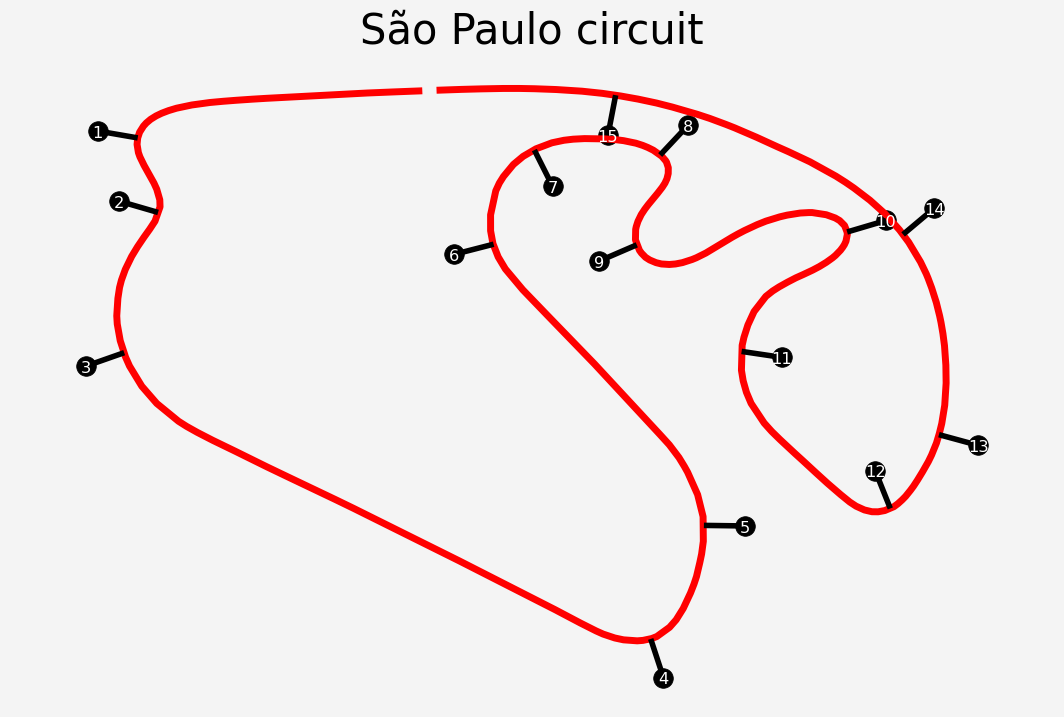

In [150]:
plot_circuit(2023, 'Brasil')


events      WARNING 	Correcting user input 'Brasil' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', 

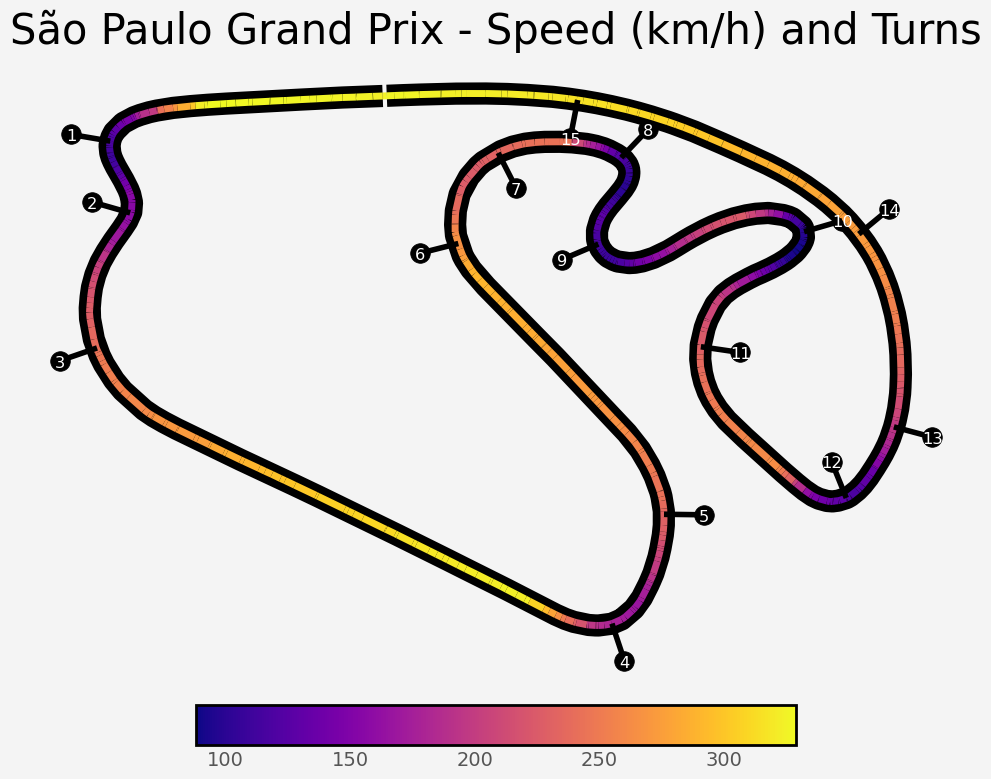

In [151]:

plot_circuit_speed_turns(2023, 'Brasil')

In [44]:
#obtain information about the circuits in a given year
def circuits_info(year):

    url = 'https://www.autoracing1.com/pl/388307/f1-2023-circuit-statistics/'

    tables = pd.read_html(url, header=0)
    circuits_df = pd.DataFrame(tables[0])

    circuits_df = circuits_df[:-1]

    #Convert Distance (km) to float 
    circuits_df['Length (km)'] = circuits_df['Length (km)'].astype(float)


    circuits_df = circuits_df[['Date', 'Event', 'Circuit', 'Location', 'Length (km)', 'Turns', 'Laps']]
    circuits_df = circuits_df.rename(columns={'Event': 'EventName'})
    circuits_df['Turns/km'] = (circuits_df['Turns'] / circuits_df['Length (km)']).round(2)

    for event in circuits_df['EventName']:
        session = fastf1.get_session(year, event, 'Q')
        session.load()
        lap = session.laps.pick_fastest()
        tel = lap.telemetry
        mean_speed = tel['Speed'].mean().round(2)
        circuits_df.loc[circuits_df['EventName'] == event, 'Mean Speed (km/h)'] = mean_speed

    circuits_df.to_csv(fr'.\data\bueno\{year}\circuits_info\circuits_{year}_info.csv', index=False)
    return circuits_df



In [46]:
circuits_info_df = circuits_info(2023)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Us

In [53]:
import plotly.express as px

# Plot the length of the circuits using Plotly
def plot_length(circuits_info_df, event):
    # Order the circuits by length in ascending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Length (km)', ascending=False)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Ensure the selected event appears in the correct order
    circuits_info_df_sorted['color'] = colors
    # circuits_info_df_sorted = circuits_info_df_sorted.sort_values(by=['Length (km)'], ascending=[True])

    # Create a horizontal bar plot using Plotly
    fig = px.bar(
        circuits_info_df_sorted,
        x='Length (km)',
        y='EventName',
        orientation='h',
        title='Circuit Lengths',
        labels={'Length (km)': 'Length (km)', 'EventName': 'Circuit'},
        color='color',
        color_discrete_map={'red': 'red', 'skyblue': 'skyblue'}
    )

    # Add text annotations for the length in meters
    fig.update_traces(text=[f'{int(length * 1000)} m' for length in circuits_info_df_sorted['Length (km)']],
                      textposition='outside')

    # Update layout for better appearance
    fig.update_layout(
        xaxis=dict(showgrid=True, gridcolor='LightGrey', title='Length (km)'),
        yaxis=dict(title='Circuit'),
        title=dict(text='Circuit Lengths', x=0.5),
        plot_bgcolor='rgba(0,0,0,0)',
        showlegend=False,
        width=1000,  # Set the width of the plot
        height=800   # Set the height of the plot
    )

    fig.show()




In [55]:
plot_length(circuits_info_df, 'São Paulo Grand Prix')

In [57]:
#Plot the length of the circuits
def plot_length(circuits_info_df, event):
    # Order the circuits by length in descending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Length (km)', ascending=True)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.barh(circuits_info_df_sorted['EventName'], circuits_info_df_sorted['Length (km)'], color=colors)
    plt.xlabel('Length (km)')
    plt.ylabel('Circuit')
    plt.title('Circuit Lengths')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {str(int((bar.get_width())*1000))}', 
                 va='center', ha='left', color='black', fontsize=10)
    plt.gca().set_axisbelow(True)
    plt.show()


#Plot the mean speed of the circuits
def plot_mean_speed(circuits_info_df, event):
    # Order the circuits by mean speed in descending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Mean Speed (km/h)', ascending=True)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.barh(circuits_info_df_sorted['EventName'], circuits_info_df_sorted['Mean Speed (km/h)'], color=colors)
    plt.xlabel('Mean Speed (km/h)')
    plt.ylabel('Circuit')
    plt.title('Circuit Mean Speeds')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width().round(2)}', 
                 va='center', ha='left', color='black', fontsize=10)
    plt.gca().set_axisbelow(True)
    plt.show()
    
# Plot the number of laps of the circuits
def plot_number_of_laps(circuits_info_df, event):
    # Order the circuits by number of laps in descending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Laps', ascending=True)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.barh(circuits_info_df_sorted['EventName'], circuits_info_df_sorted['Laps'], color=colors)
    plt.xlabel('Number of Laps')
    plt.ylabel('Circuit')
    plt.title('Number of Laps')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width().round(2)}', 
                 va='center', ha='left', color='black', fontsize=10)
    plt.gca().set_axisbelow(True)

    plt.show()

# Plot the number of turns of the circuits
def plot_number_of_turns(circuits_info_df, event):
    # Order the circuits by number of turns in descending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Turns', ascending=True)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.barh(circuits_info_df_sorted['EventName'], circuits_info_df_sorted['Turns'], color=colors)
    plt.xlabel('Number of Turns')
    plt.ylabel('Circuit')
    plt.title('Number of Turns')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width().round(2)}', 
                 va='center', ha='left', color='black', fontsize=10)
    plt.gca().set_axisbelow(True)

    plt.show()

# Plot the turns/km ratio of the circuits
def plot_turns_per_km(circuits_info_df, event):
    # Order the circuits by turns/km ratio in descending order
    circuits_info_df_sorted = circuits_info_df.sort_values(by='Turns/km', ascending=True)

    # Set the colors for the bars
    colors = ['red' if circuit == event else 'skyblue' for circuit in circuits_info_df_sorted['EventName']]

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 12))
    bars = plt.barh(circuits_info_df_sorted['EventName'], circuits_info_df_sorted['Turns/km'], color=colors)
    plt.xlabel('Turns/km')
    plt.ylabel('Circuit')
    plt.title('Turns per km')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width().round(2)}', 
                 va='center', ha='left', color='black', fontsize=10)
    plt.gca().set_axisbelow(True)

    plt.show()

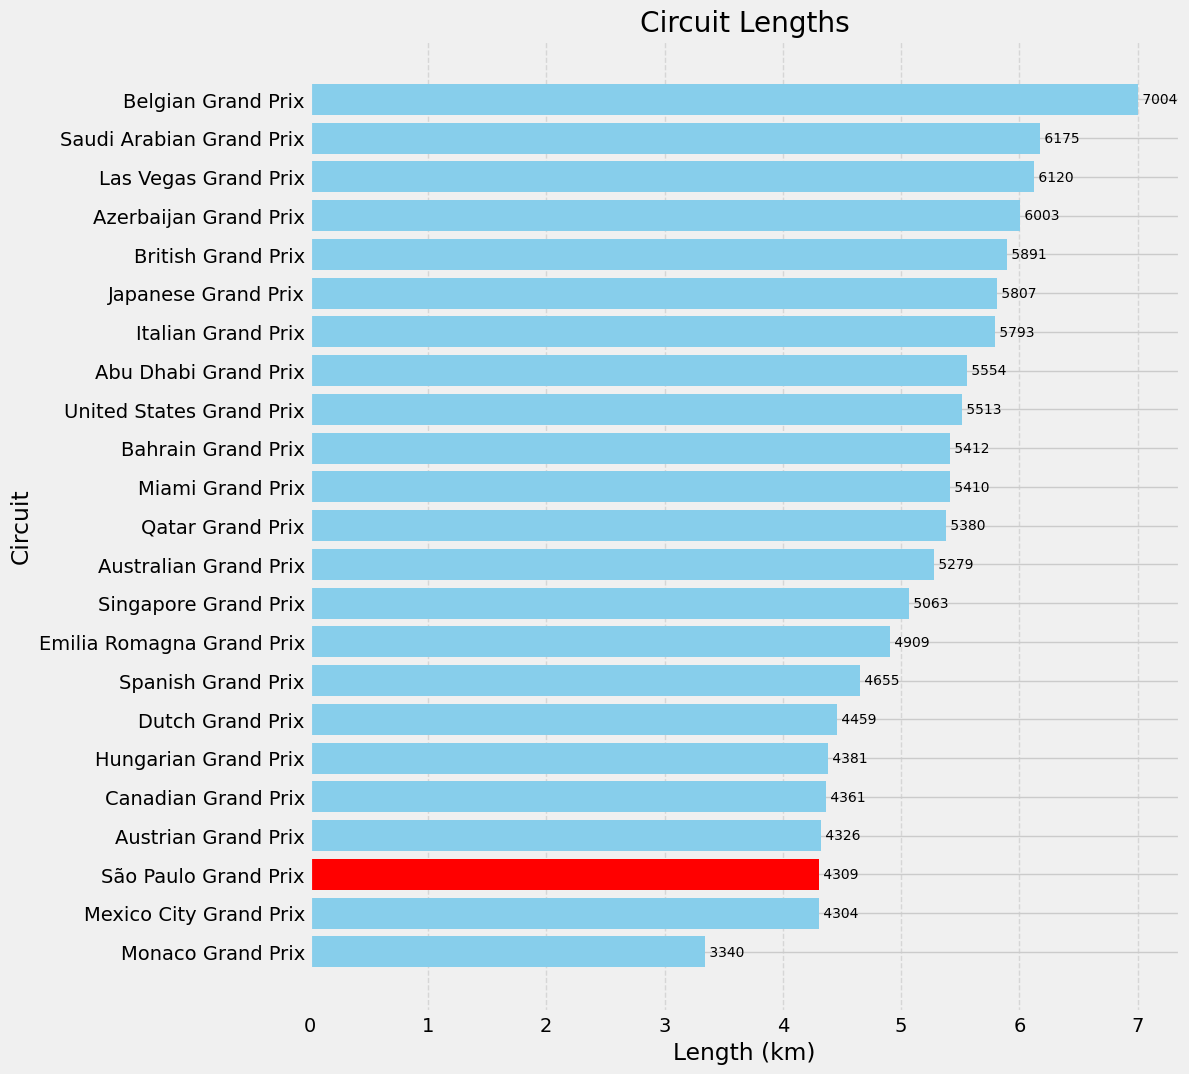

In [58]:
plot_length(circuits_info_df, 'São Paulo Grand Prix')


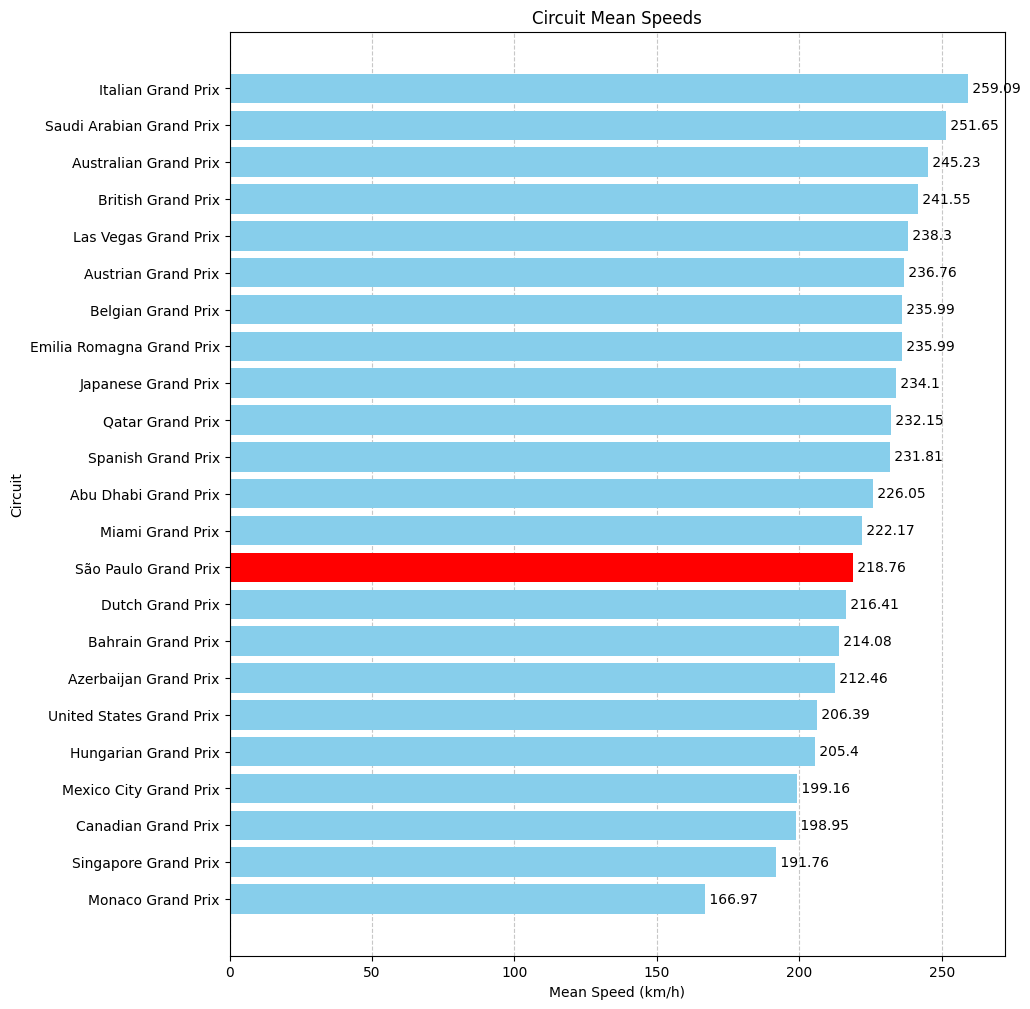

In [20]:
plot_mean_speed(circuits_info_df, 'São Paulo Grand Prix')


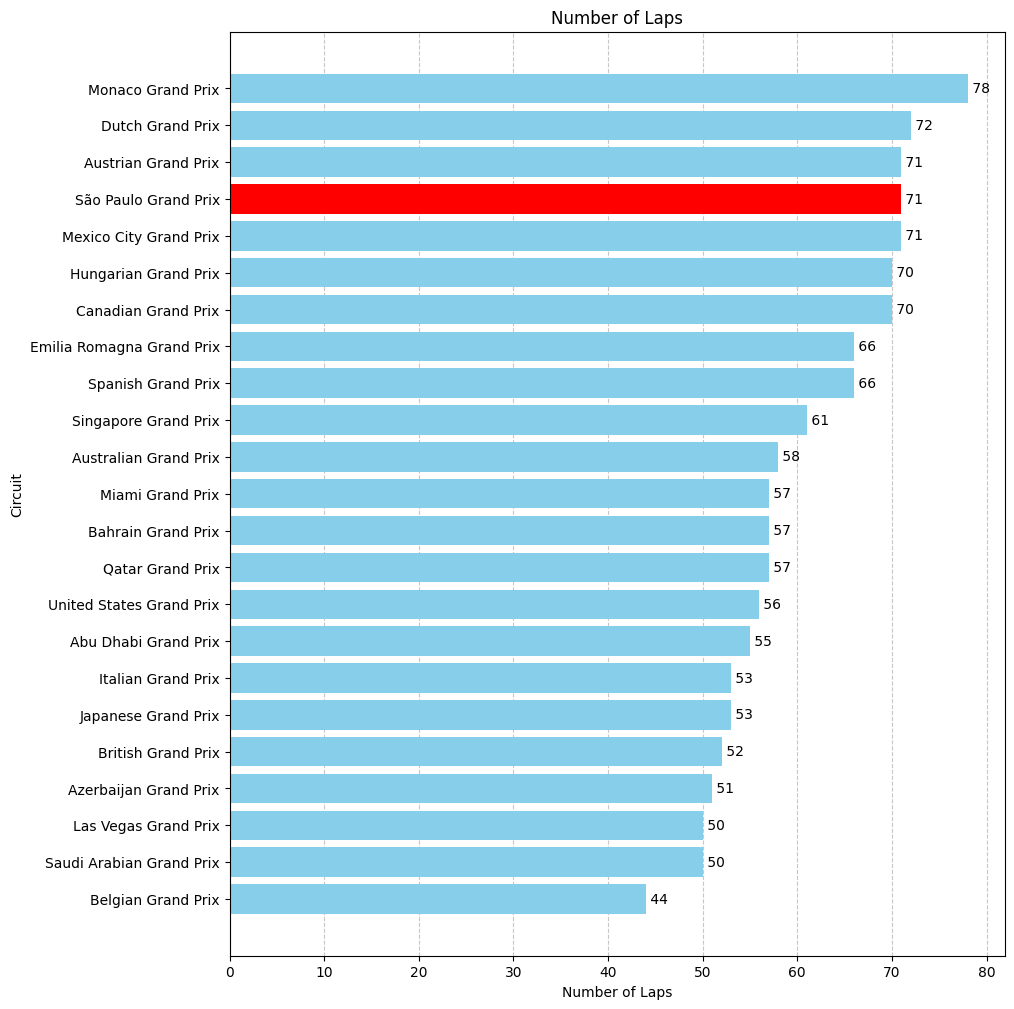

In [22]:
plot_number_of_laps(circuits_info_df, 'São Paulo Grand Prix')

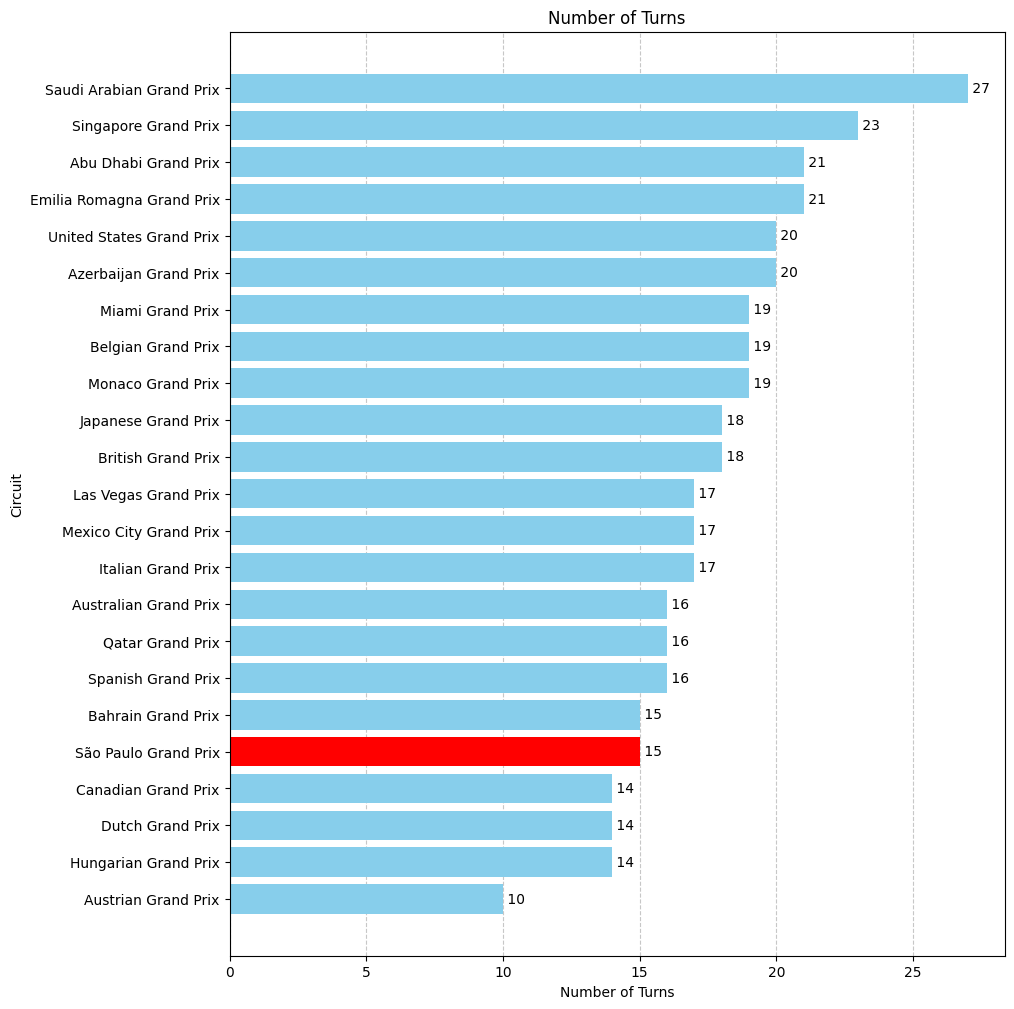

In [23]:
plot_number_of_turns(circuits_info_df, 'São Paulo Grand Prix')


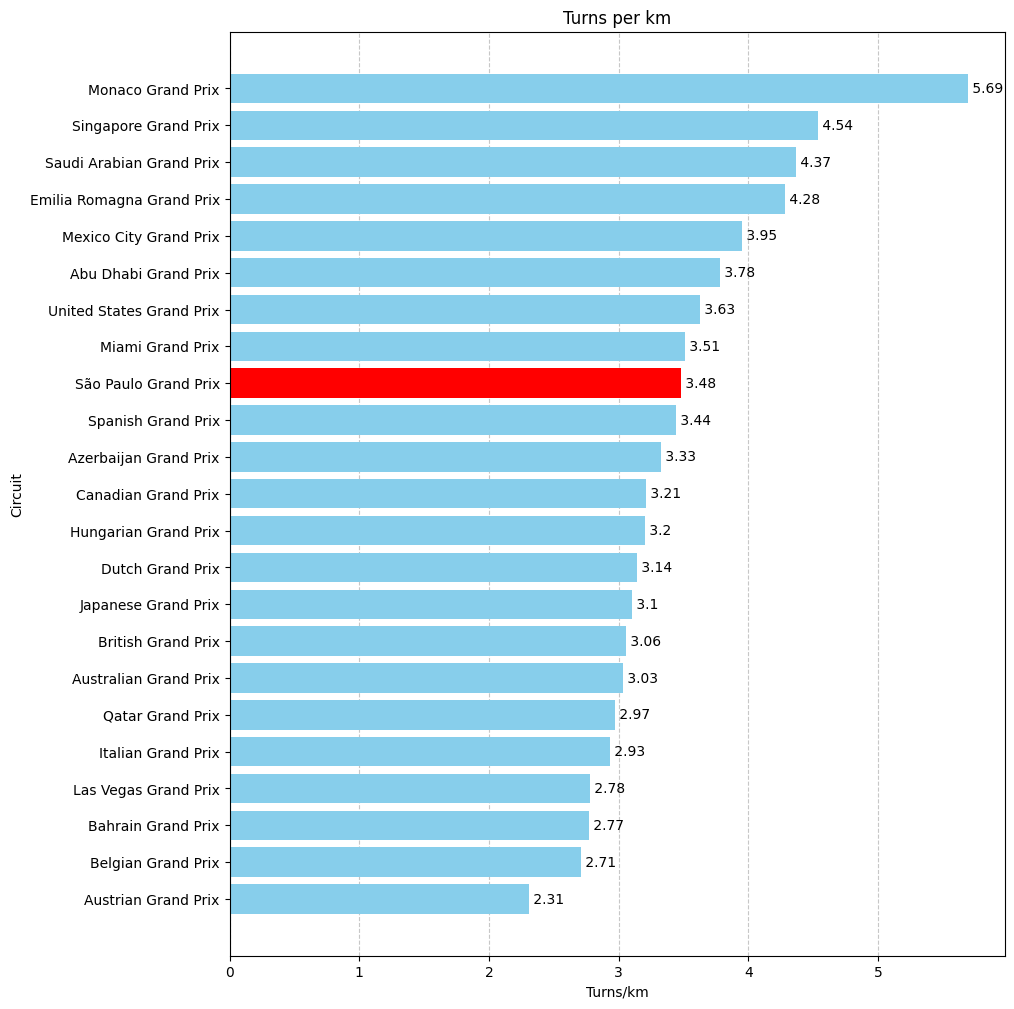

In [24]:
plot_turns_per_km(circuits_info_df, 'São Paulo Grand Prix')
